# Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Loading the Dataset

In [3]:
data=pd.read_csv('Automobile_insurance_fraud.csv')
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
# checking shapes

data.shape

(1000, 40)

In [5]:
# Observations:

# This Dataset has 1000 rows and 40 columns. Let's study the column's names and their charectaristics.

In [6]:
# checking columns names

data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# Observations:

# Among 40 features, 21 are object datatype and 19 are numarical data.

# _c39 column has all NaN datatype. Let's drop the column.

# For other 39 columns, all are non-null value.

# Two features(policy_bind_date, incident_date) here with datetime datatypes. 
#Let's split them in terms of date, month and year.

# Converting Date columns and Extracting Day, Month and Year:

In [9]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

In [10]:
data['policy_bind_day'] = data['policy_bind_date'].dt.day
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['policy_bind_year'] = data['policy_bind_date'].dt.year


data['incident_day'] = data['incident_date'].dt.day
data['incident_month'] = data['incident_date'].dt.month
data['incident_year'] = data['incident_date'].dt.year

# Drop policy_bind_date and incident_date columns
data.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [11]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                   

In [12]:
# Observations:

# 1) Here policy_number,incident_location have different value for every different entries.  we will drop this column.

# 2) Also insured_zip have around 995 different entries for total 1000 dataset. Drop this column also.

# 3) incident_year have 1 value for total dataset. Let's drop it.

# Drop Unnecessary columns:

In [13]:
data.drop(["_c39", 'policy_number', 'incident_location','insured_zip', 'incident_year'], axis=1, inplace= True)
data.shape

(1000, 39)

# Checking duplicate:

In [14]:
data.duplicated().sum()

0

In [15]:
# Observatios:

# This dataset has no duplicate values

# Statistical features:

In [16]:
data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
total_claim_amount           41812.5000  58055.0  70592.500    114920.00  
injury_claim                  4295.0000   6775.0  11305.000     21450.00  
property_claim                4445.0000   6750.0  10885.000     23670.00  
vehicle_claim                30292.5000  42100.0  50822.500     79560.00  
auto_year                     2000.0000   2005.0   2010.000      2015.00  
policy_bind_day                  8.0000     16.0     23.000        31.00  
policy_bind_month                4.0000      7.0      9.000        12.00  
policy_bind_year              1995.0000   2002.0   2008.000      2015.00  
incident_day                     2.0000     15.0     22.000        31.00  
incident_month                   1.0000      2.0      5.000        12.00

In [17]:
data.describe(include=object).T

count unique                      top freq
policy_state             1000      3                       OH  352
policy_csl               1000      3                  250/500  351
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      4           Rear Collision  292
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
property_damage          1000      3                        ?  360
police_report_available  1000      3                        ?  343
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

In [18]:
# Observations:

# 'auto_year' column means year from which Automobile in operational on road. Let's convert it into age column.
# As incident year is 2015, let's use 2015 as base year for new column creation.

# Seems skewness is present.

# Some '?' is present.

# Target variable is fraud_reported and it is a categorical data. Need Classification model to solve this.

# Extract Age:

In [19]:
data['Automobile_Age']=2015 - data['auto_year']

data.drop("auto_year",axis=1,inplace=True)

# Let check if any whitespace, 'NA', '?' or '-' exist in dataset

In [20]:
data.isin([' ','NA','-']).sum().any()

False

In [21]:
# Observations:

# Dataset is free from ' ', 'NA' ,'-'

In [22]:
data.isin(['?']).sum().any()

True

In [23]:
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

In [24]:
# Observations:

# Let replace '?' with np.NaN.

In [25]:
data=data.replace('?',np.NaN)

# Checking Null:

In [26]:
null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values %']).sort_values('Null Values'))


missing value details 

                              Null Values  Null Values %
months_as_customer                     0            0.0
incident_hour_of_the_day               0            0.0
number_of_vehicles_involved            0            0.0
bodily_injuries                        0            0.0
witnesses                              0            0.0
total_claim_amount                     0            0.0
injury_claim                           0            0.0
property_claim                         0            0.0
vehicle_claim                          0            0.0
auto_make                              0            0.0
auto_model                             0            0.0
fraud_reported                         0            0.0
policy_bind_day                        0            0.0
policy_bind_month                      0            0.0
policy_bind_year                       0            0.0
incident_day                           0            0.0
incident_month         

In [27]:
# Observations:

# Null values are present in the total dataset.

# The feature containing missing values are categorical in nature. 
# Let's impute them with mode of that particular category.

# Missing value imputation:

In [28]:
data['property_damage'].fillna(data['property_damage'].mode()[0],inplace=True)
data['police_report_available'].fillna(data['police_report_available'].mode()[0],inplace=True)
data['collision_type'].fillna(data['collision_type'].mode()[0],inplace=True)

# Missing value checking after imputation:

<AxesSubplot:>

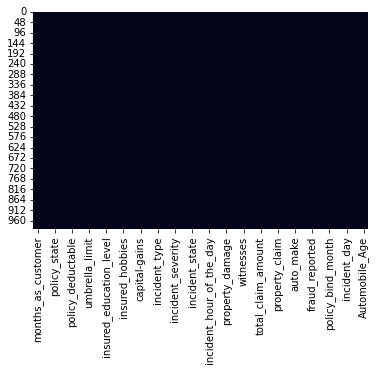

In [29]:
sns.heatmap(data.isnull(),cbar=False)

In [30]:
# Observations:

# Null value is removed from total dataset.



# Explore policy_csl:

In [31]:
data['policy_csl'].sample(n=6)

561     250/500
375     250/500
459    500/1000
666     100/300
174     100/300
271     100/300
Name: policy_csl, dtype: object

In [32]:
# Observations:

# As per wikipedia, if the liability coverage on auto policy is written as a combined single limit (CSL), 
# there is no differentiation between bodily injury payouts per person, per accident, or property damage claims.

# Here policy_csl have two numerical data separated by '/', resulting into object datatype.

# Let's split this column into two CSL columns.



In [33]:
data['csl_1st_part']= data.policy_csl.str.split('/',expand=True)[0]
data['csl_2nd_part']= data.policy_csl.str.split('/',expand=True)[1]

# Drop policy_csl column 
data.drop("policy_csl",axis=1,inplace=True)

# Changing datatype:

In [34]:
data[['csl_1st_part', 'csl_2nd_part']]= data[['csl_1st_part', 'csl_2nd_part']].astype(int)

# Differentiate Numerical and Categorical Data:

In [35]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age', 'csl_1st_part', 'csl_2nd_part'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Exploratory Data Analysis(EDA):


# Categorical Data Analysis:

In [36]:
cat_features= ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 
               'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 
               'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
               'property_damage', 'police_report_available', 'auto_make', 'auto_model']
for i in cat_features:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of policy_state is---
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
Value counts of insured_sex is---
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
Value counts of insured_education_level is---
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
Value counts of insured_occupation is---
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
Value counts of insured_hobbies is---
 reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55


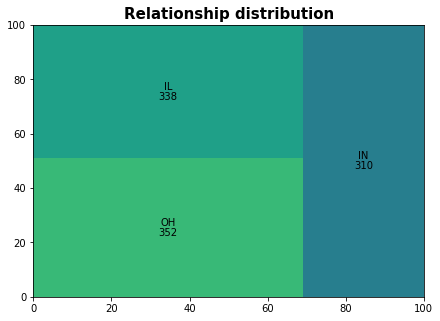

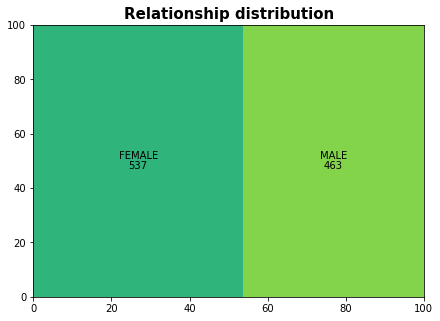

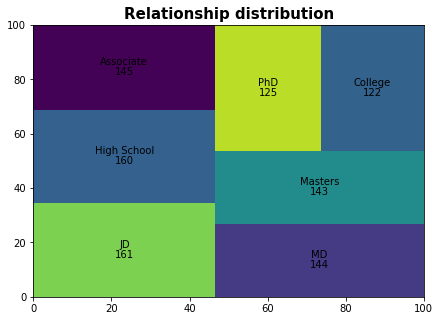

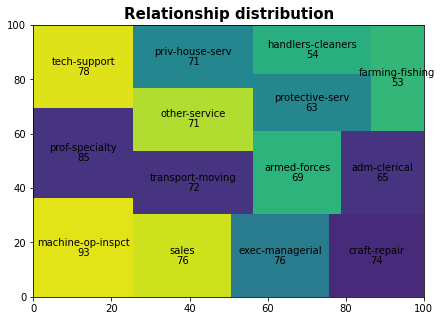

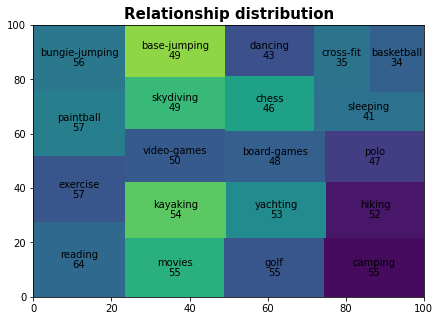

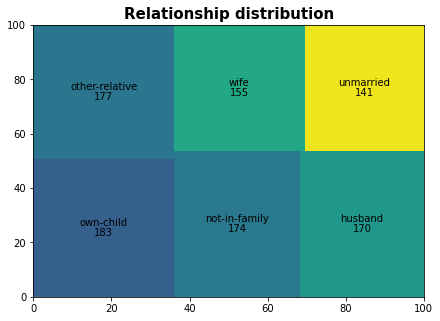

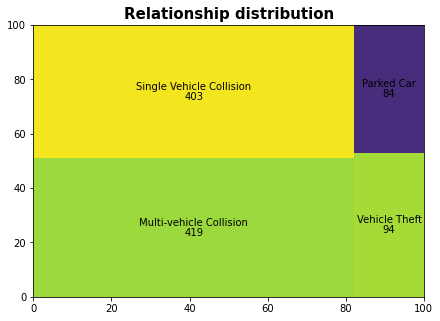

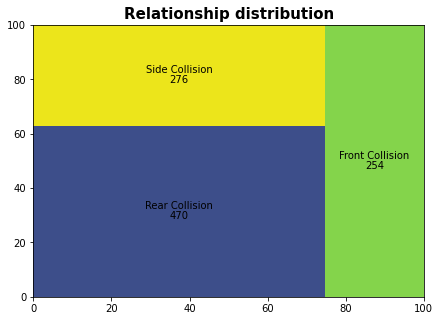

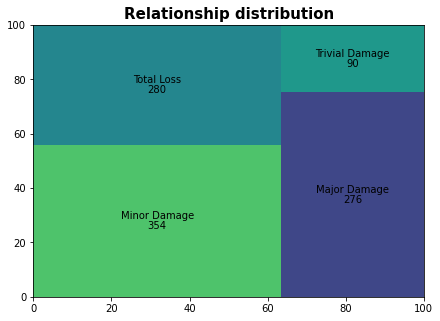

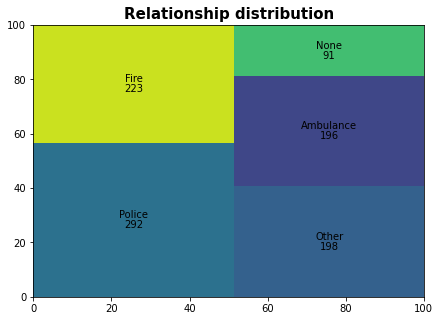

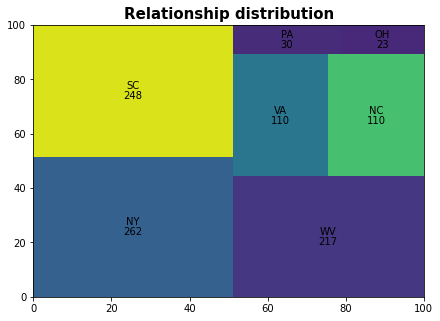

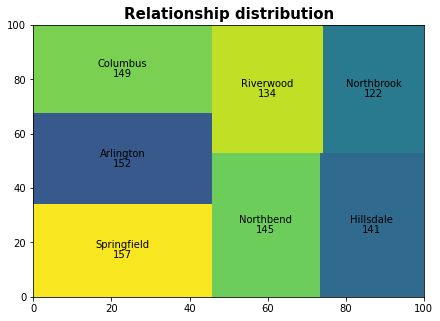

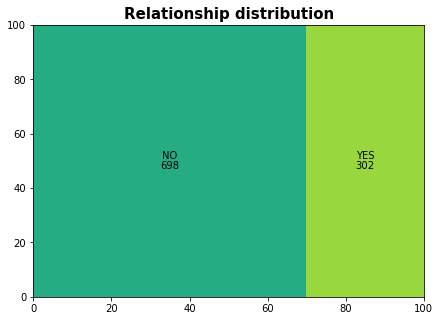

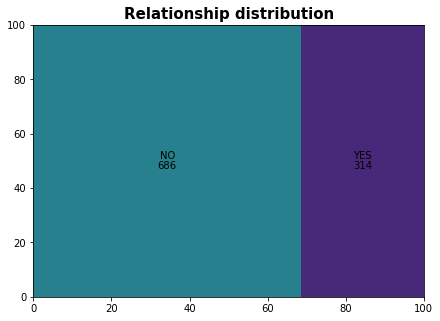

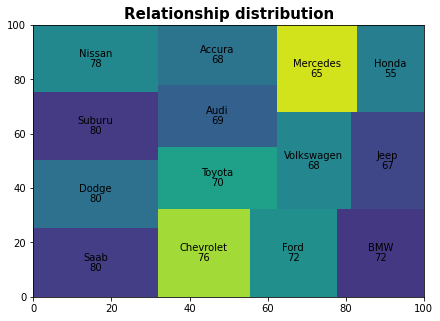

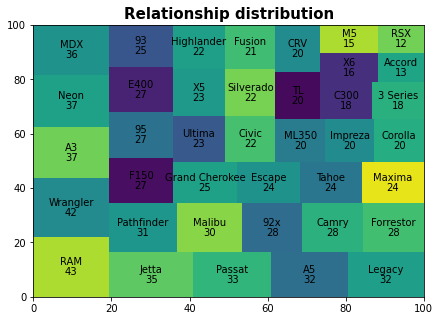

In [37]:
import squarify
for i in cat_features:
    plt.figure(figsize=(7, 5))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

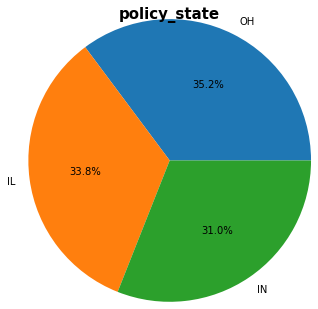

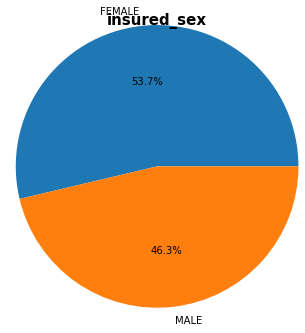

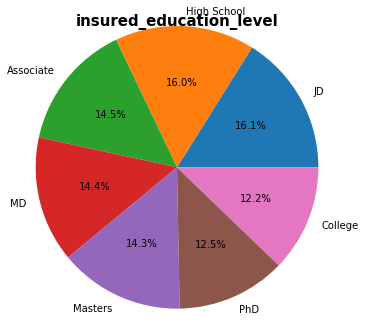

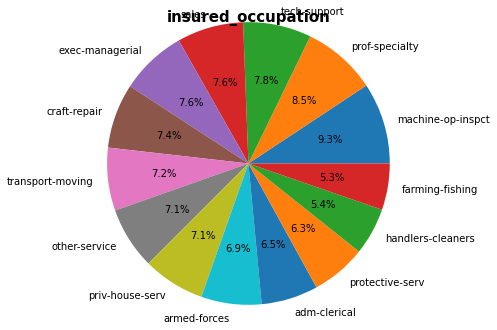

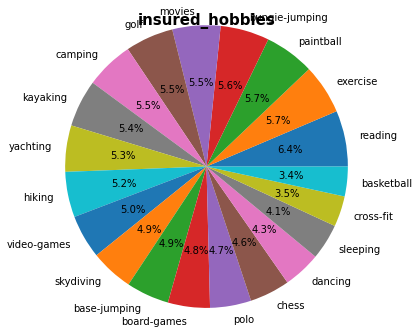

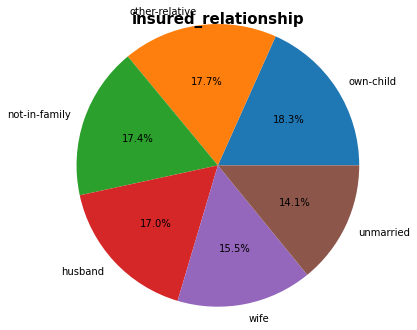

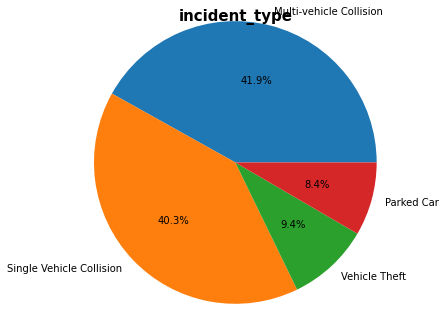

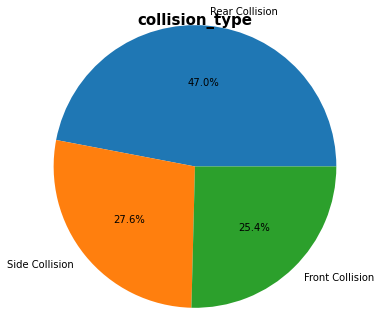

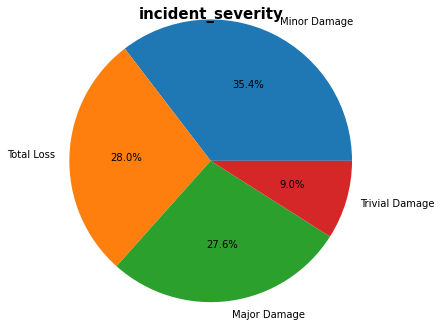

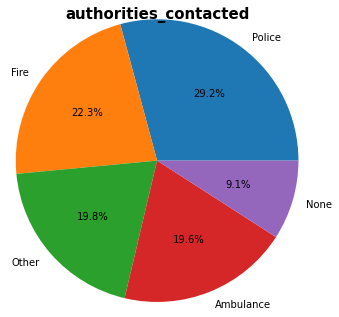

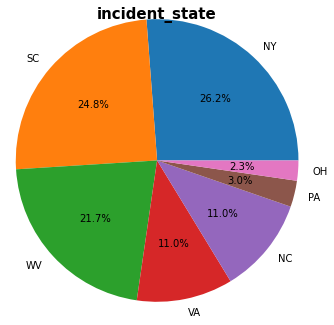

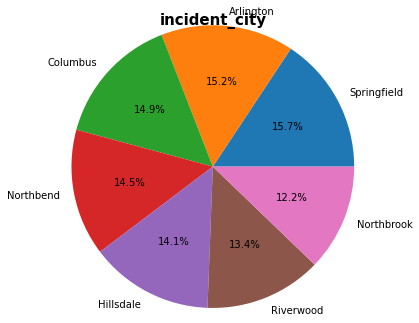

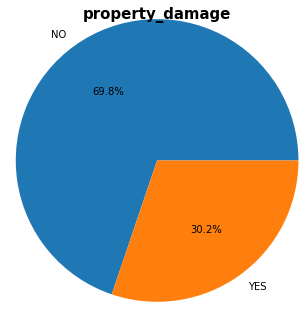

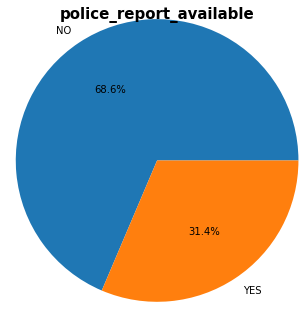

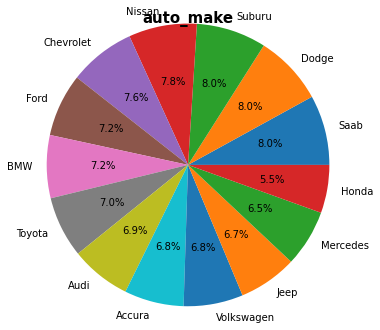

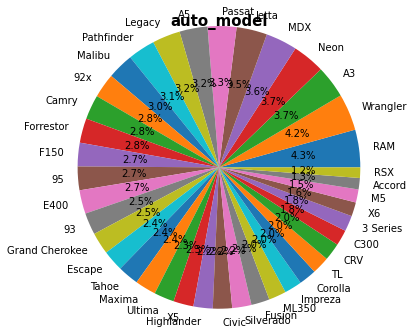

In [38]:
for i in cat_features:
    plt.figure(figsize=(5,5))
    data[i].value_counts().plot.pie(radius =1.3, textprops ={ 'fontsize':10}, autopct='%2.1f%%')
    plt.title(i,fontsize =15,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

In [39]:
# Observations:

# The three unique value of policy_state is in equal percentage.

# Female are more than male.

# Maximum insurance claims are for accident type as Multi-vehicle collision or single vehicle collision.

# Collision type for maximum case is rear collision.

# Maximum accident causes minor damage.

# For around 70%, no property are damaged.

# For around 70%, no Police report is available.


# Analysis of Numarical variable:

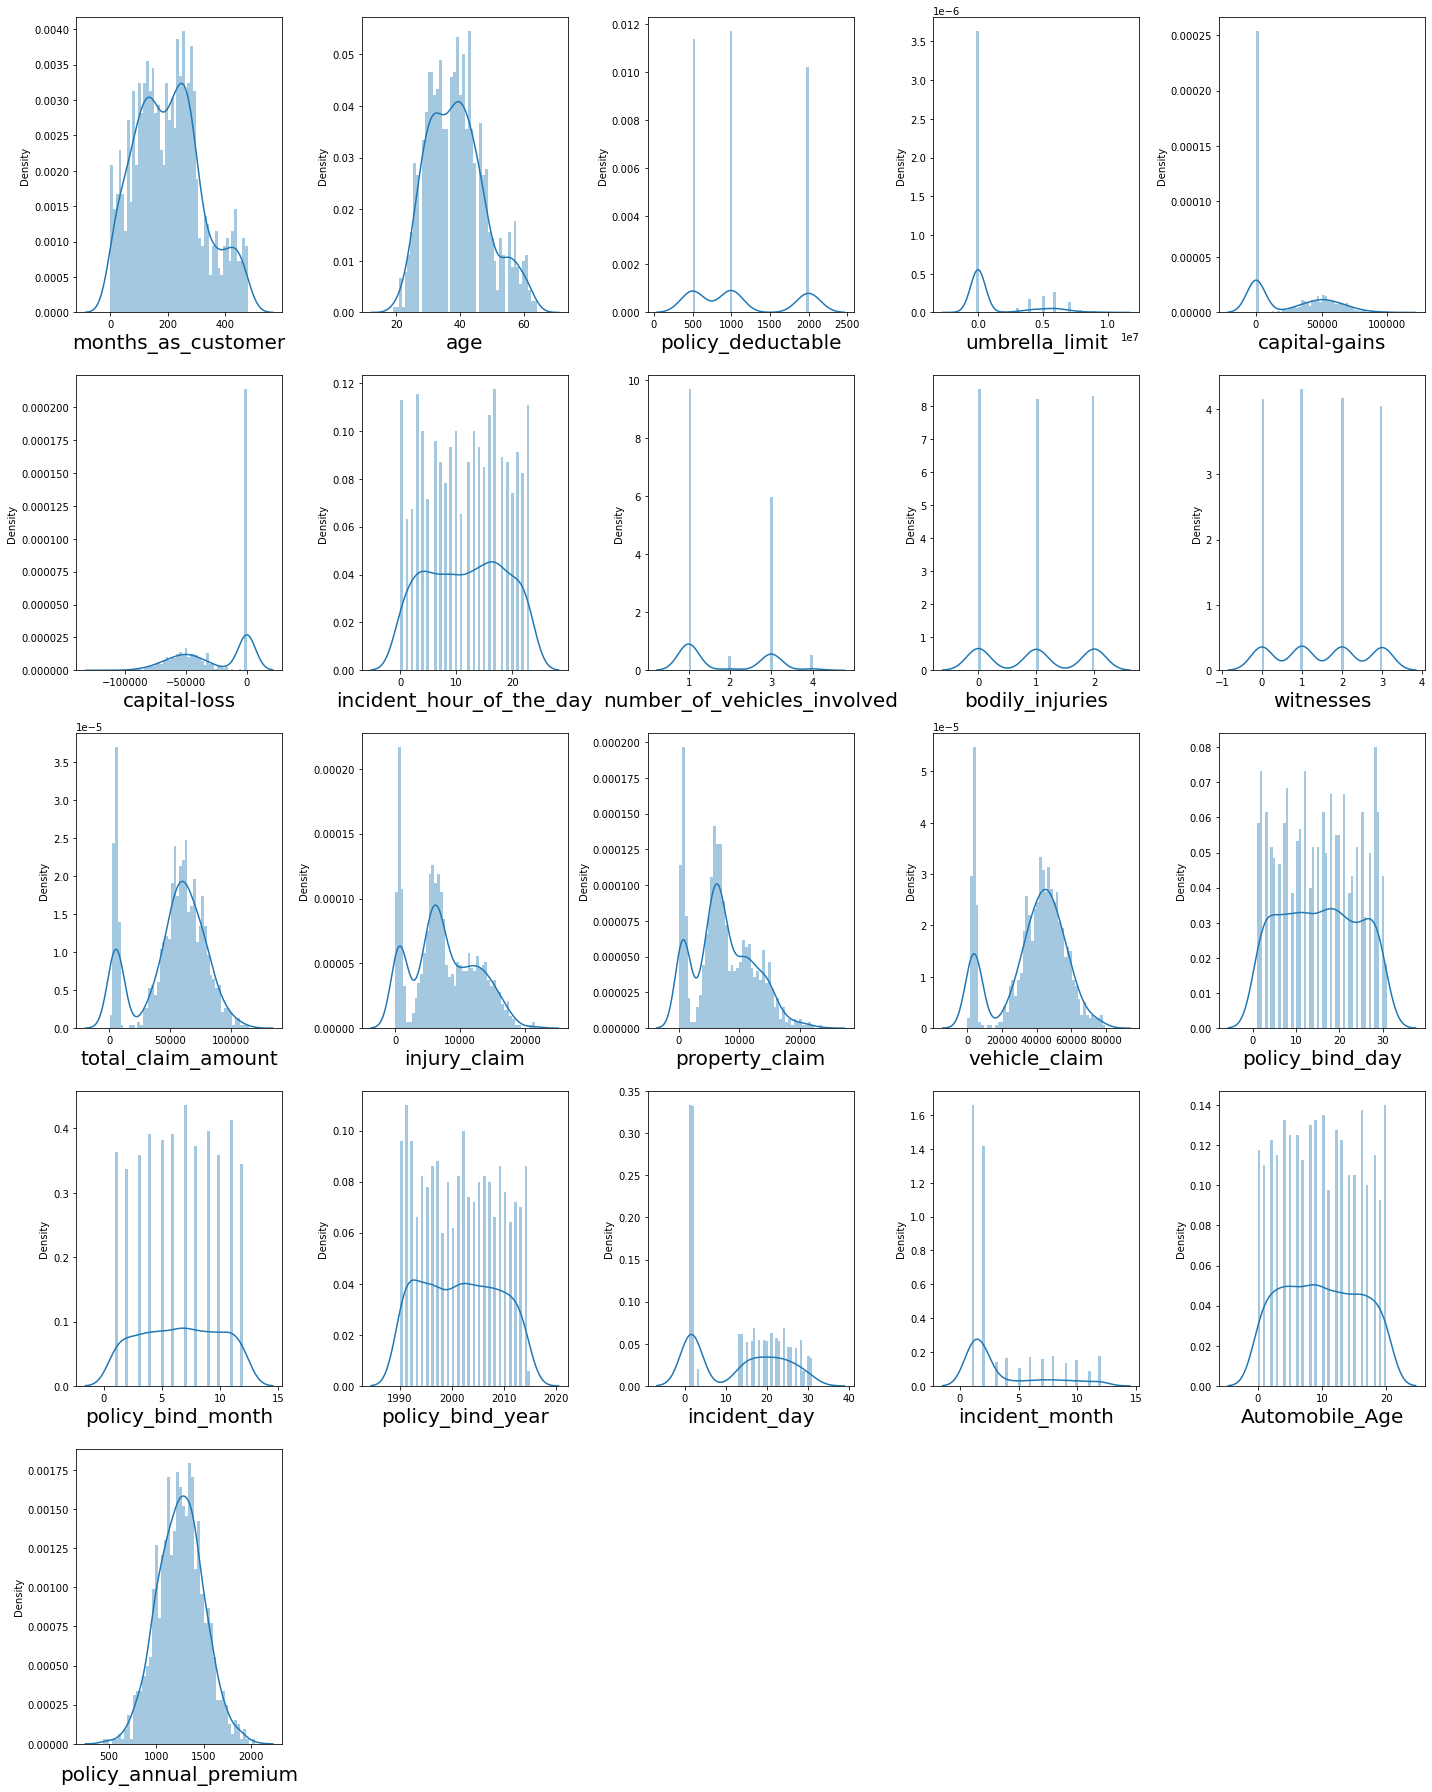

In [40]:
num_features= ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains',
              'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 
              'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 
              'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age', 'policy_annual_premium']

i=0
plt.figure(figsize=(20,25))
for p in num_features:
    plt.subplot(5,5,i+1)
    sns.distplot(data[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

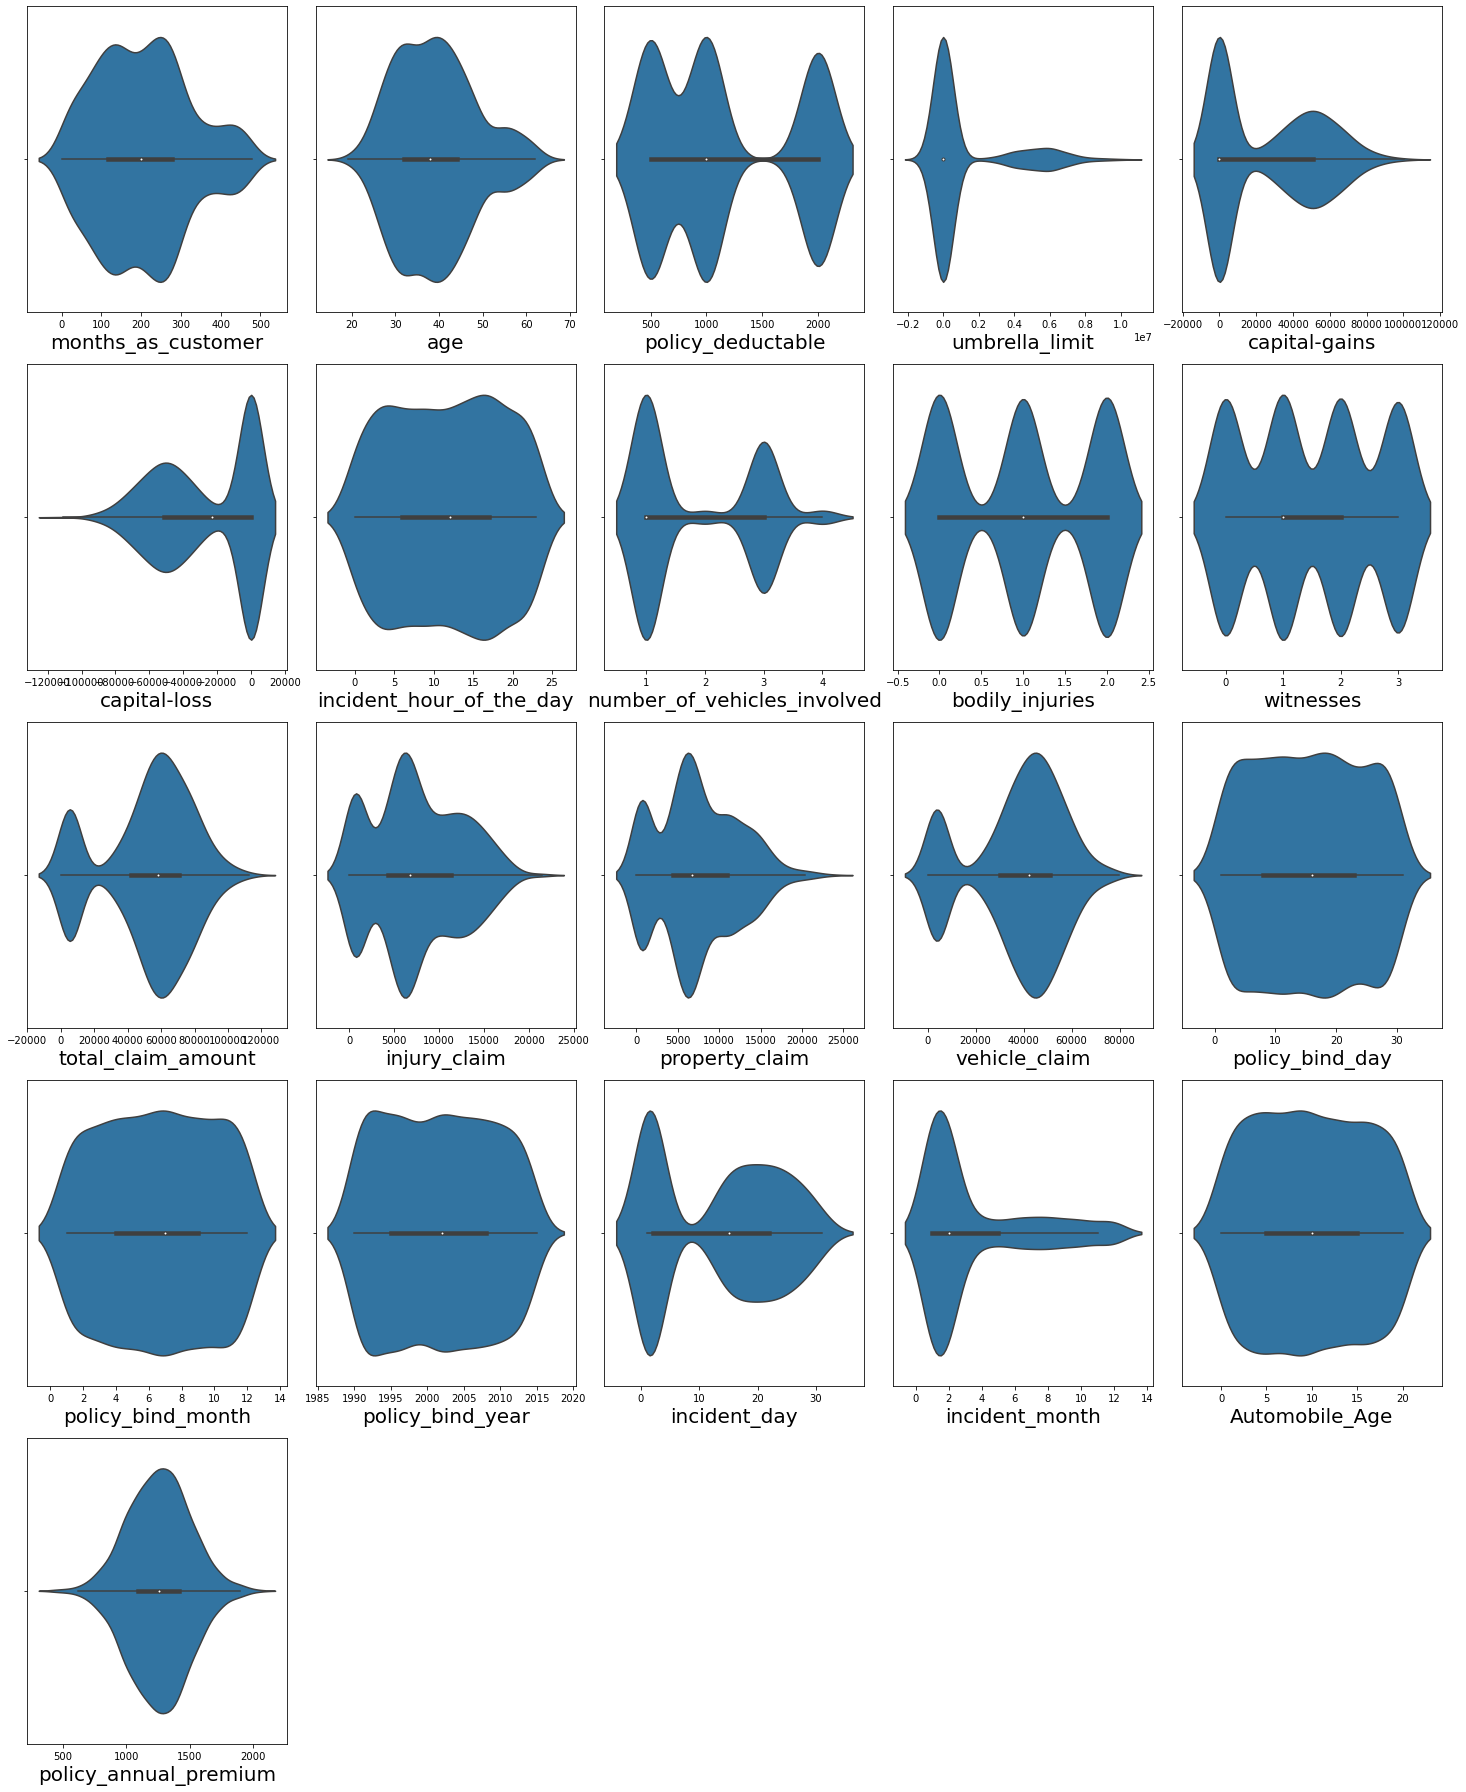

In [41]:
i=0
plt.figure(figsize=(20,25))
for p in num_features:
    plt.subplot(5,5,i+1)
    sns.violinplot(data[p])
    plt.xlabel(p,fontsize=20)
    i+=1 
plt.tight_layout()
plt.show()

In [42]:
# Skewness of data present

# Target variable analysis:

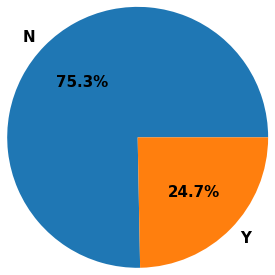

In [43]:
data['fraud_reported'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.ylabel(' ')
plt.show()

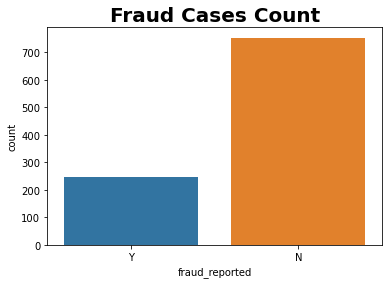

In [44]:
sns.countplot('fraud_reported',data=data)
plt.title('Fraud Cases Count',fontsize=20,fontweight ='bold')
plt.show()


In [45]:
# Observation :

# 75.3% claims are not fraud, they are real accident.

# 24.7% claims are detected as fraud.

# Dataset is imbalanced in nature.

# Different feature's impact on target variable:

# Bivariate Analysis:

In [46]:
# 1) 1. months_as_customer Vs fraud_reported:

print('Minimum months_as_customer :',data['months_as_customer'].min())
print('Maximum months_as_customer :',data['months_as_customer'].max())

Minimum months_as_customer : 0
Maximum months_as_customer : 479


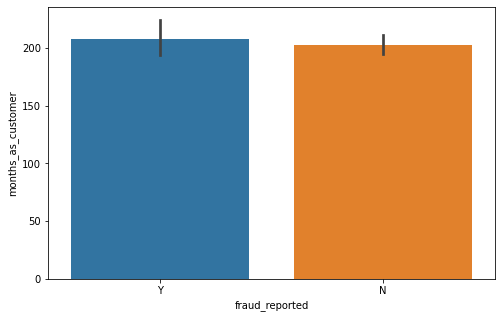

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x = "fraud_reported", y = "months_as_customer", data = data)
plt.show()


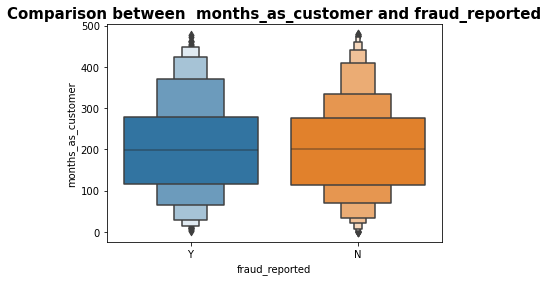

In [48]:
plt.title('Comparison between  months_as_customer and fraud_reported',fontsize=15, fontweight= "bold")
sns.boxenplot(data['fraud_reported'],data["months_as_customer"])
plt.show()

In [49]:
# Observations:

# Avg months_as_customer is same for fraud_reported positive and negetive.


In [50]:
# 2. age Vs fraud_reported:

print('Minimum age :',data['age'].min())
print('Maximum age :',data['age'].max())
print('Average age :',data['age'].mean())

Minimum age : 19
Maximum age : 64
Average age : 38.948


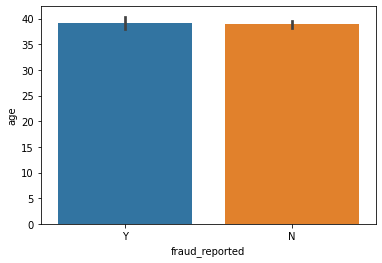

In [51]:
sns.barplot(x = "fraud_reported", y = "age", data = data)
plt.show()

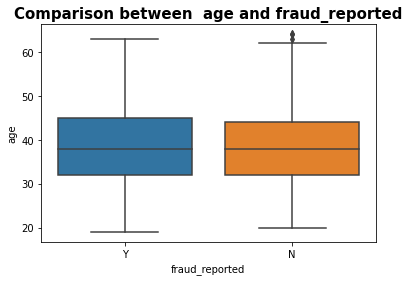

In [52]:
plt.title('Comparison between  age and fraud_reported',fontsize=15, fontweight= "bold")
sns.boxplot(data['fraud_reported'],data["age"])
plt.show()

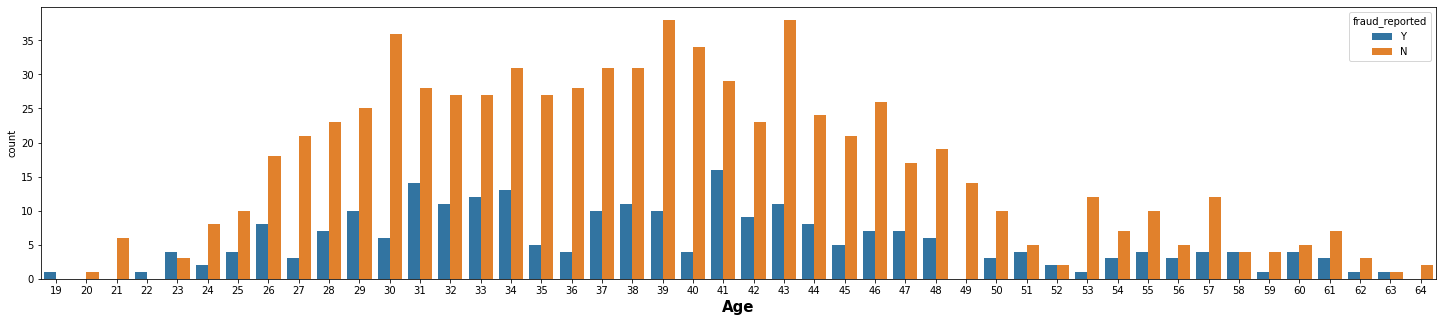

In [53]:
plt.figure(figsize=(25,5))
sns.countplot(x=data['age'], hue=data['fraud_reported'])
plt.xlabel('Age',fontsize=15,fontweight ='bold')
plt.show()

In [54]:
data['age_group'] = pd.cut(data.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

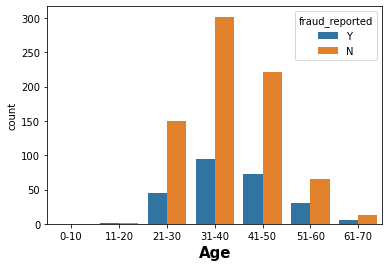

In [55]:
sns.countplot(x=data['age_group'], hue=data['fraud_reported'])
plt.xlabel('Age',fontsize=15,fontweight ='bold')
plt.show()


In [56]:
# Observations:

# Avg age is same for fraud_reported positive and negative.

# Maximum fraud_reported comes from people with age group of 31-50 year.

# Very few cases in 11-20 and 60-70 year old people.

# max reported fraud is between 41-50 year

In [57]:
# 3. policy_deductable Vs fraud_reported:

data['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

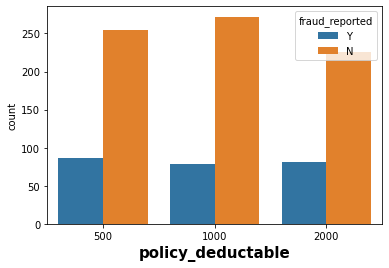

In [58]:
sns.countplot(x=data['policy_deductable'], hue=data['fraud_reported'])
plt.xlabel('policy_deductable',fontsize=15,fontweight ='bold')
plt.show()

In [59]:
pd.crosstab([data.policy_deductable],data["fraud_reported"],margins=True)

fraud_reported       N    Y   All
policy_deductable                
500                255   87   342
1000               272   79   351
2000               226   81   307
All                753  247  1000

In [60]:
# Observations:

# There is no such relation between policy_deductable and fraud_reported.

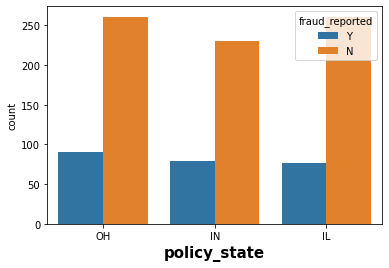

In [61]:
# 4. policy_state Vs fraud_reported:

sns.countplot(x=data['policy_state'], hue=data['fraud_reported'])
plt.xlabel('policy_state',fontsize=15,fontweight ='bold')
plt.show()

In [62]:
pd.crosstab([data.policy_state],data["fraud_reported"],margins=True)

fraud_reported    N    Y   All
policy_state                  
IL              261   77   338
IN              231   79   310
OH              261   91   352
All             753  247  1000

In [63]:
# Observations:

# There is no such relation between policy_state and fraud_reported, they are almost same for all states.

# Maximum fraud comes from state of Ohio.

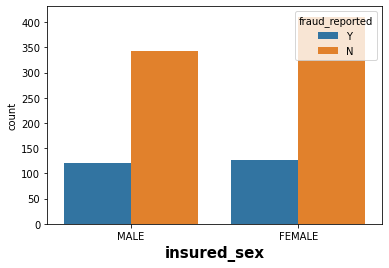

In [64]:
# 5. insured_sex Vs fraud_reported:

sns.countplot(x=data['insured_sex'], hue=data['fraud_reported'])
plt.xlabel('insured_sex',fontsize=15,fontweight ='bold')
plt.show()

In [65]:
pd.crosstab([data.policy_state, data.insured_sex],data["fraud_reported"],margins=True)

fraud_reported              N    Y   All
policy_state insured_sex                
IL           FEMALE       140   39   179
             MALE         121   38   159
IN           FEMALE       125   38   163
             MALE         106   41   147
OH           FEMALE       146   49   195
             MALE         115   42   157
All                       753  247  1000

In [66]:
# Observations:

# Almost same amount of fraud cases comes from same gender.


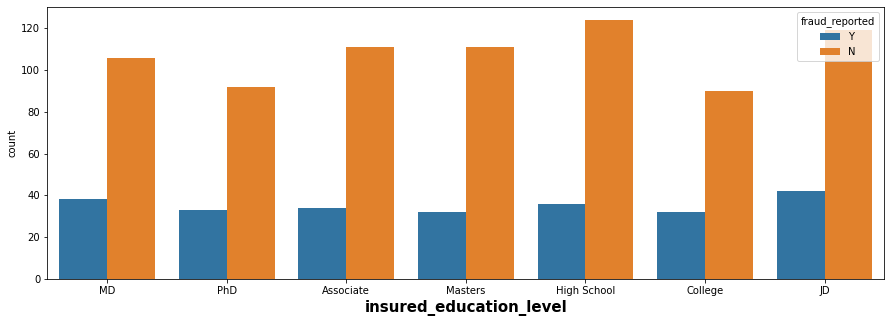

In [67]:
# 6. insured_education_level Vs fraud_reported:

plt.figure(figsize=(15,5))
sns.countplot(x=data['insured_education_level'], hue=data['fraud_reported'])
plt.xlabel('insured_education_level',fontsize=15,fontweight ='bold')
plt.show()

In [68]:
# Observations:

# The tendency of fraud reported across every education backgroud equally, even in Masters and PhD. 

# Max fraud comes from JD.

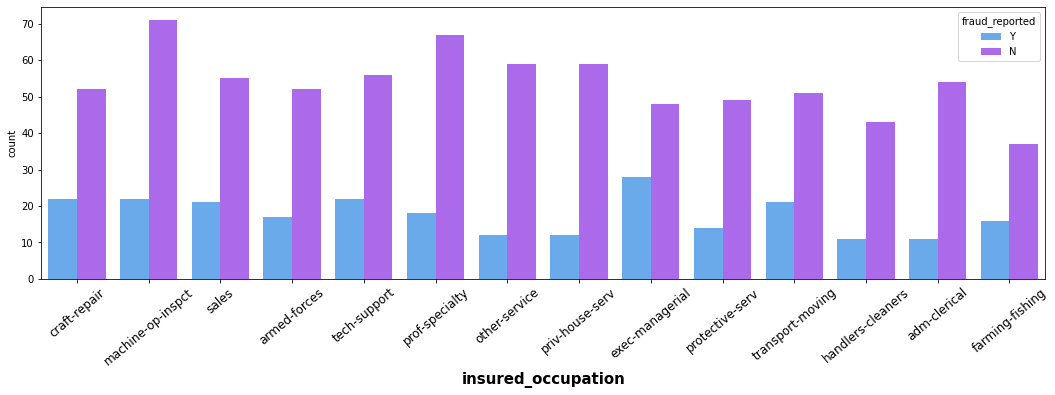

In [69]:
# 7. insured_occupation Vs fraud_reported:

plt.figure(figsize=(18,5))
sns.countplot(x=data['insured_occupation'], hue=data['fraud_reported'], palette = 'cool')
plt.xlabel('insured_occupation',fontsize=15,fontweight ='bold')
plt.xticks(rotation=40,fontsize=12)
plt.show()

In [70]:
pd.crosstab([data.insured_occupation],data["fraud_reported"],margins=True).T

insured_occupation  adm-clerical  armed-forces  craft-repair  exec-managerial  \
fraud_reported                                                                  
N                             54            52            52               48   
Y                             11            17            22               28   
All                           65            69            74               76   

insured_occupation  farming-fishing  handlers-cleaners  machine-op-inspct  \
fraud_reported                                                              
N                                37                 43                 71   
Y                                16                 11                 22   
All                              53                 54                 93   

insured_occupation  other-service  priv-house-serv  prof-specialty  \
fraud_reported                                                       
N                              59               59              67   
Y                              12               12              18   
All                            71               71              85   

insured_occupation  protective-serv  sales  tech-support  transport-moving  \
fraud_reported                                                               
N                                49     55            56                51   
Y                                14     21            22                21   
All                              63     76            78                72   

insured_occupation   All  
fraud_reported            
N                    753  
Y                    247  
All                 1000

In [71]:
# Observations:

# Maximum fraud is from exec-managerial occupation.

# Maximum less fraud comes from the occupation as machine-op-inspct.

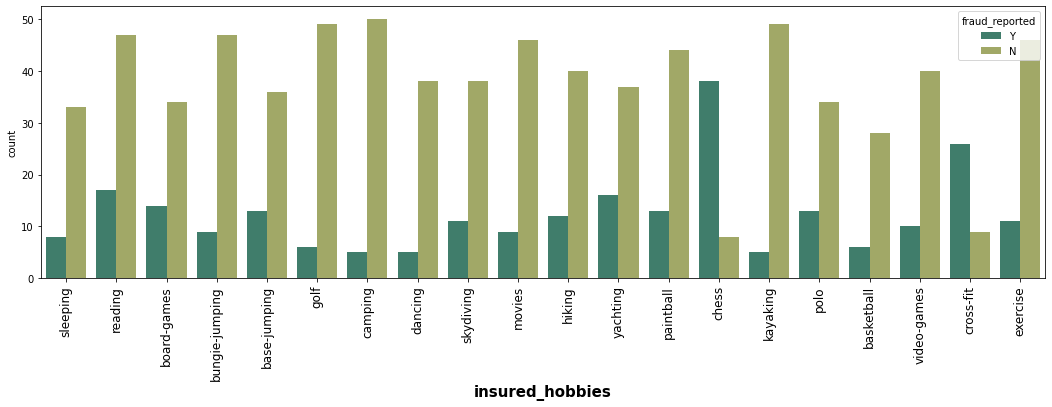

In [72]:
# 8. insured_hobbies Vs fraud_reported:

plt.figure(figsize=(18,5))
sns.countplot(x=data['insured_hobbies'], hue=data['fraud_reported'], palette = 'gist_earth')
plt.xlabel('insured_hobbies',fontsize=15,fontweight ='bold')
plt.xticks(rotation=90,fontsize=12)
plt.show()

In [73]:
# Observations:

# Maximum fraud is from chess hobbies.

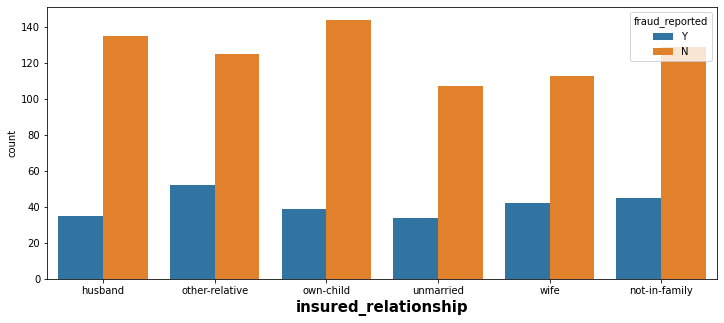

In [74]:
# 9. insured_relationship Vs fraud_reported:

plt.figure(figsize=(12,5))
sns.countplot(x=data['insured_relationship'], hue=data['fraud_reported'])
plt.xlabel('insured_relationship',fontsize=15,fontweight ='bold')
plt.show()

In [75]:
# Observations:

# Maximum fraud is from other relatives.

# Maximum correct insurance comes from own child relationship.

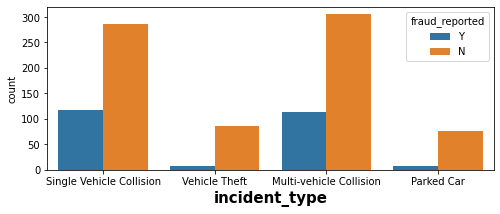

In [76]:
# 10. incident_type Vs fraud_reported:

plt.figure(figsize=(8,3))
sns.countplot(x=data['incident_type'], hue=data['fraud_reported'])
plt.xlabel('incident_type',fontsize=15,fontweight ='bold')
plt.show()

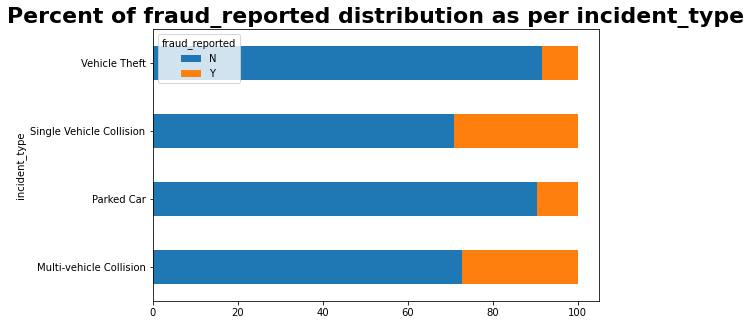

In [77]:
table= pd.crosstab(data['incident_type'], data['fraud_reported'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of fraud_reported distribution as per incident_type', fontsize=22, fontweight='bold')
plt.show()

In [78]:
# Observations:

# Minimum fraud cases comes from Vehicle theft and parked car.

# Maximum correct cases is from multi vehicle collision.


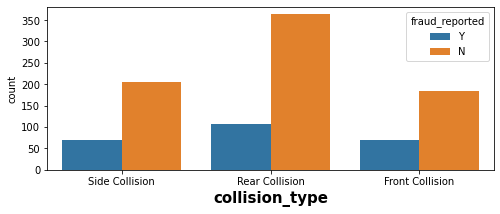

In [79]:
# 11. collision_type Vs fraud_reported:

plt.figure(figsize=(8,3))
sns.countplot(x=data['collision_type'], hue=data['fraud_reported'])
plt.xlabel('collision_type',fontsize=15,fontweight ='bold')
plt.show()

In [80]:
pd.crosstab([data.collision_type, data.incident_type],data["fraud_reported"],margins=True).T

collision_type         Front Collision                           \
incident_type  Multi-vehicle Collision Single Vehicle Collision   
fraud_reported                                                    
N                                   87                       97   
Y                                   28                       42   
All                                115                      139   

collision_type          Rear Collision                                      \
incident_type  Multi-vehicle Collision Parked Car Single Vehicle Collision   
fraud_reported                                                               
N                                  103         76                       98   
Y                                   49          8                       42   
All                                152         84                      140   

collision_type                        Side Collision                           \
incident_type  Vehicle Theft Multi-vehicle Collision Single Vehicle Collision   
fraud_reported                                                                  
N                         86                     115                       91   
Y                          8                      37                       33   
All                       94                     152                      124   

collision_type   All  
incident_type         
fraud_reported        
N                753  
Y                247  
All             1000

In [81]:
# Observations:

# Maximim fraud comes from rear collision.

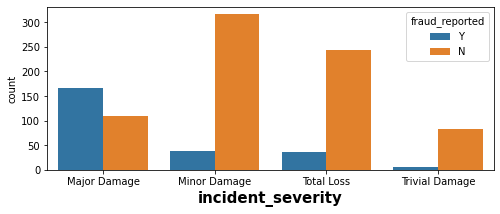

In [82]:
# 12. incident_severity Vs fraud_reported:

plt.figure(figsize=(8,3))
sns.countplot(x=data['incident_severity'], hue=data['fraud_reported'])
plt.xlabel('incident_severity',fontsize=15,fontweight ='bold')
plt.show()

In [83]:
pd.crosstab([data.incident_type, data.fraud_reported],data["incident_severity"],margins=True)

incident_severity                        Major Damage  Minor Damage  \
incident_type            fraud_reported                               
Multi-vehicle Collision  N                         60           119   
                         Y                         84            11   
Parked Car               N                          0            37   
                         Y                          0             5   
Single Vehicle Collision N                         49           119   
                         Y                         83            17   
Vehicle Theft            N                          0            41   
                         Y                          0             5   
All                                               276           354   

incident_severity                        Total Loss  Trivial Damage   All  
incident_type            fraud_reported                                    
Multi-vehicle Collision  N                      126               0   305  
                         Y                       19               0   114  
Parked Car               N                        0              39    76  
                         Y                        0               3     8  
Single Vehicle Collision N                      118               0   286  
                         Y                       17               0   117  
Vehicle Theft            N                        0              45    86  
                         Y                        0               3     8  
All                                             280              90  1000

In [84]:
pd.crosstab([data.incident_severity],data["collision_type"],margins=True)

collision_type     Front Collision  Rear Collision  Side Collision   All
incident_severity                                                       
Major Damage                    84              96              96   276
Minor Damage                    81             188              85   354
Total Loss                      89              96              95   280
Trivial Damage                   0              90               0    90
All                            254             470             276  1000

In [85]:
pd.crosstab([data.incident_severity],data["fraud_reported"],margins=True)

fraud_reported       N    Y   All
incident_severity                
Major Damage       109  167   276
Minor Damage       316   38   354
Total Loss         244   36   280
Trivial Damage      84    6    90
All                753  247  1000

In [86]:
# Observations:

# Minimum fraud cases comes from Trivial Damage.

# Among 1000, 316 cases are from Minor Damage and they are not fraud.

# All Rear Collision is cause for Trivial Damage.

# All Trivial Damage is for Parked Car and Vehicle Theft and among them only 6 are fraud case(fraud_reported= Yes)

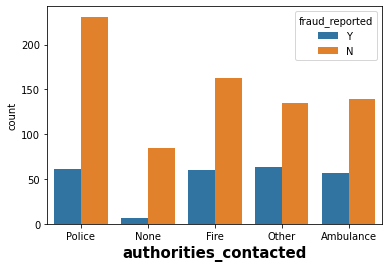

In [87]:
# 13. authorities_contacted Vs fraud_reported:

sns.countplot(x=data['authorities_contacted'], hue=data['fraud_reported'])
plt.xlabel('authorities_contacted',fontsize=15,fontweight ='bold')
plt.show()

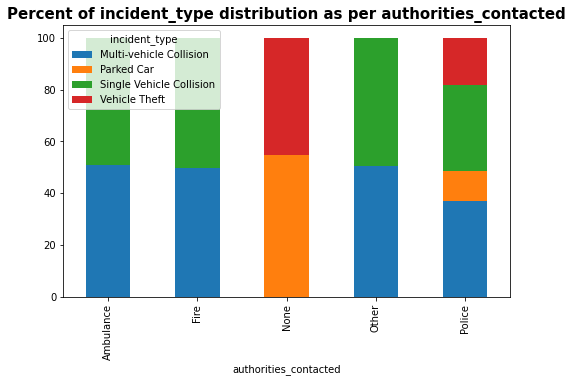

In [88]:
table= pd.crosstab(data['authorities_contacted'], data['incident_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percent of incident_type distribution as per authorities_contacted', fontsize=15, fontweight='bold')
plt.show()

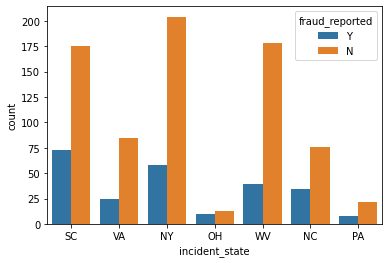

In [89]:
#14. incident_state Vs fraud_reported:

sns.countplot(x=data['incident_state'], hue=data['fraud_reported'])
plt.show()


In [90]:
# Observations:

# Maximum correct case comes from NY city.

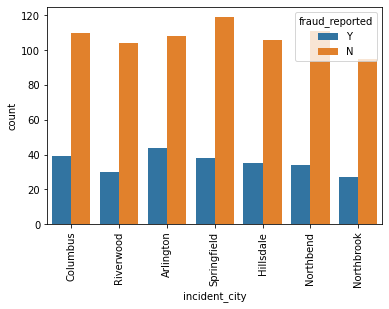

In [91]:
# 15. incident_city Vs fraud_reported:

sns.countplot(x=data['incident_city'], hue=data['fraud_reported'])
plt.xticks(rotation=90)
plt.show()


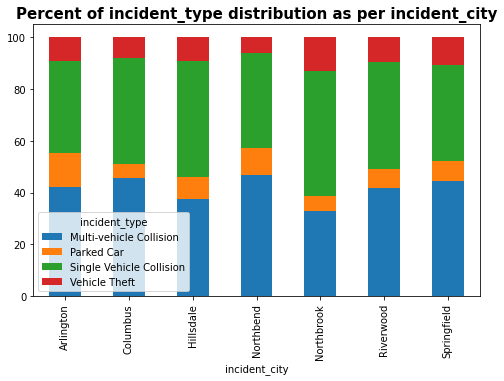

In [92]:
table= pd.crosstab(data['incident_city'], data['incident_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percent of incident_type distribution as per incident_city', fontsize=15, fontweight='bold')
plt.show()

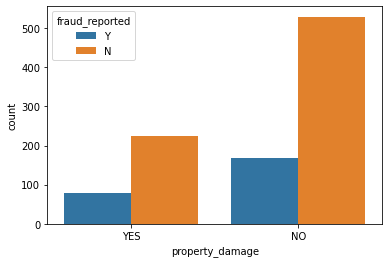

In [93]:
# 16. property_damage Vs fraud_reported:

sns.countplot(x=data['property_damage'], hue=data['fraud_reported'])
plt.show()

In [94]:
# Observations:

# Maximum fraud is from Arlington city.

# Most theft vehicle heppend from Northbrook state

In [95]:
# 17. police_report_available Vs fraud_reported:

pd.crosstab([data.police_report_available],data["fraud_reported"],margins=True)

fraud_reported             N    Y   All
police_report_available                
NO                       511  175   686
YES                      242   72   314
All                      753  247  1000

In [96]:
# Observations:

# No such observation is found from above plot.

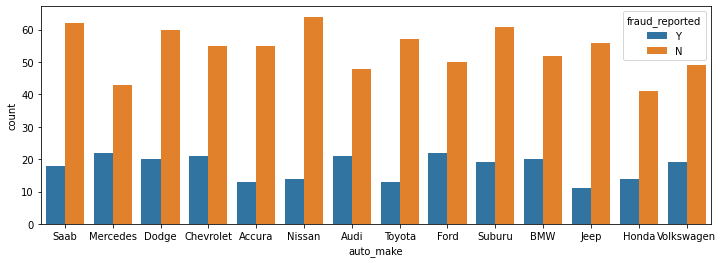

In [97]:
# 18. auto_make Vs fraud_reported:

plt.figure(figsize=(12,4))
sns.countplot(x=data['auto_make'], hue=data['fraud_reported'])
plt.show()

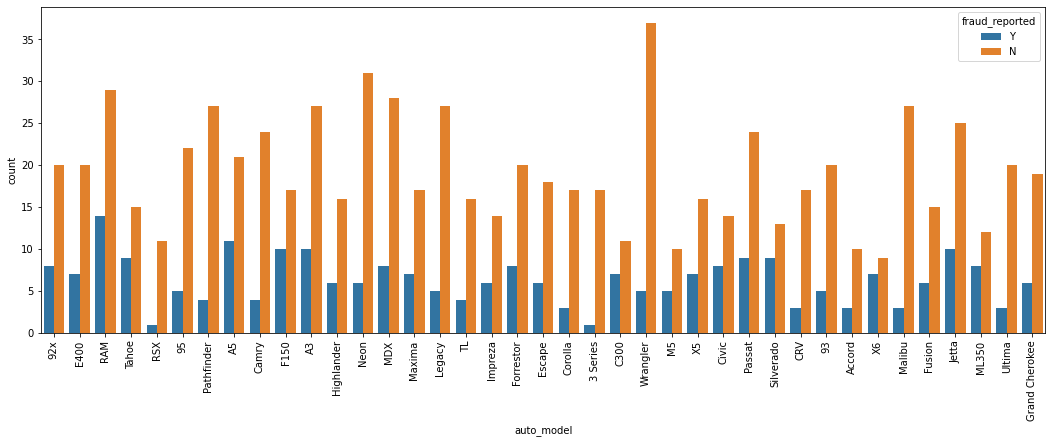

In [98]:
# 19. auto_model Vs fraud_reported:

plt.figure(figsize=(18,6))
sns.countplot(x=data['auto_model'], hue=data['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

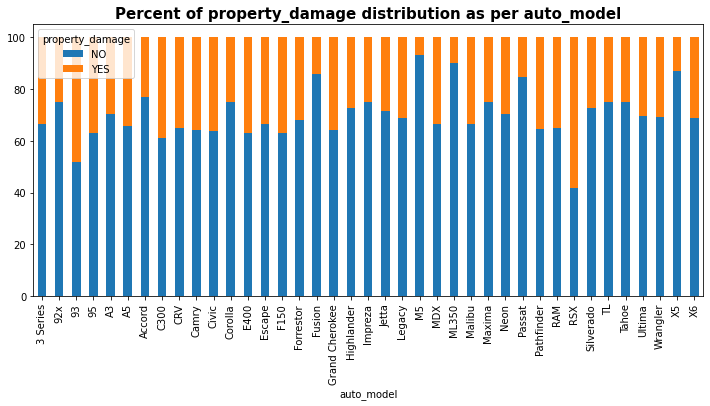

In [99]:
table= pd.crosstab(data['auto_model'], data['property_damage'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(12,5))
plt.title('Percent of property_damage distribution as per auto_model', fontsize=15, fontweight='bold')
plt.show()

In [100]:
# Observations:

# Maximum auto model is Wrangler reported for true insurance case.

# Maximum fraud is RAM model.

# Least property_damage is for MS model.

# Max property_damage is for RSX model.

In [101]:
# 20. umbrella_limit Vs fraud_reported:

pd.crosstab([data.umbrella_limit],data["fraud_reported"],margins=True).T

umbrella_limit  -1000000    0  2000000  3000000  4000000  5000000  6000000  \
fraud_reported                                                               
N                      1  611        1       10       26       31       44   
Y                      0  187        2        2       13       15       13   
All                    1  798        3       12       39       46       57   

umbrella_limit  7000000  8000000  9000000  10000000   All  
fraud_reported                                             
N                    20        5        3         1   753  
Y                     9        3        2         1   247  
All                  29        8        5         2  1000

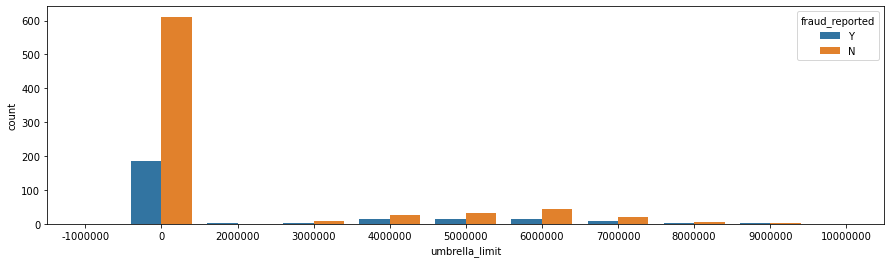

In [102]:
plt.figure(figsize=(15,4))
sns.countplot(x=data['umbrella_limit'], hue=data['fraud_reported'])
plt.show()

In [103]:
# Observations:

# Maximum fraud is 0 umbrella_limit.

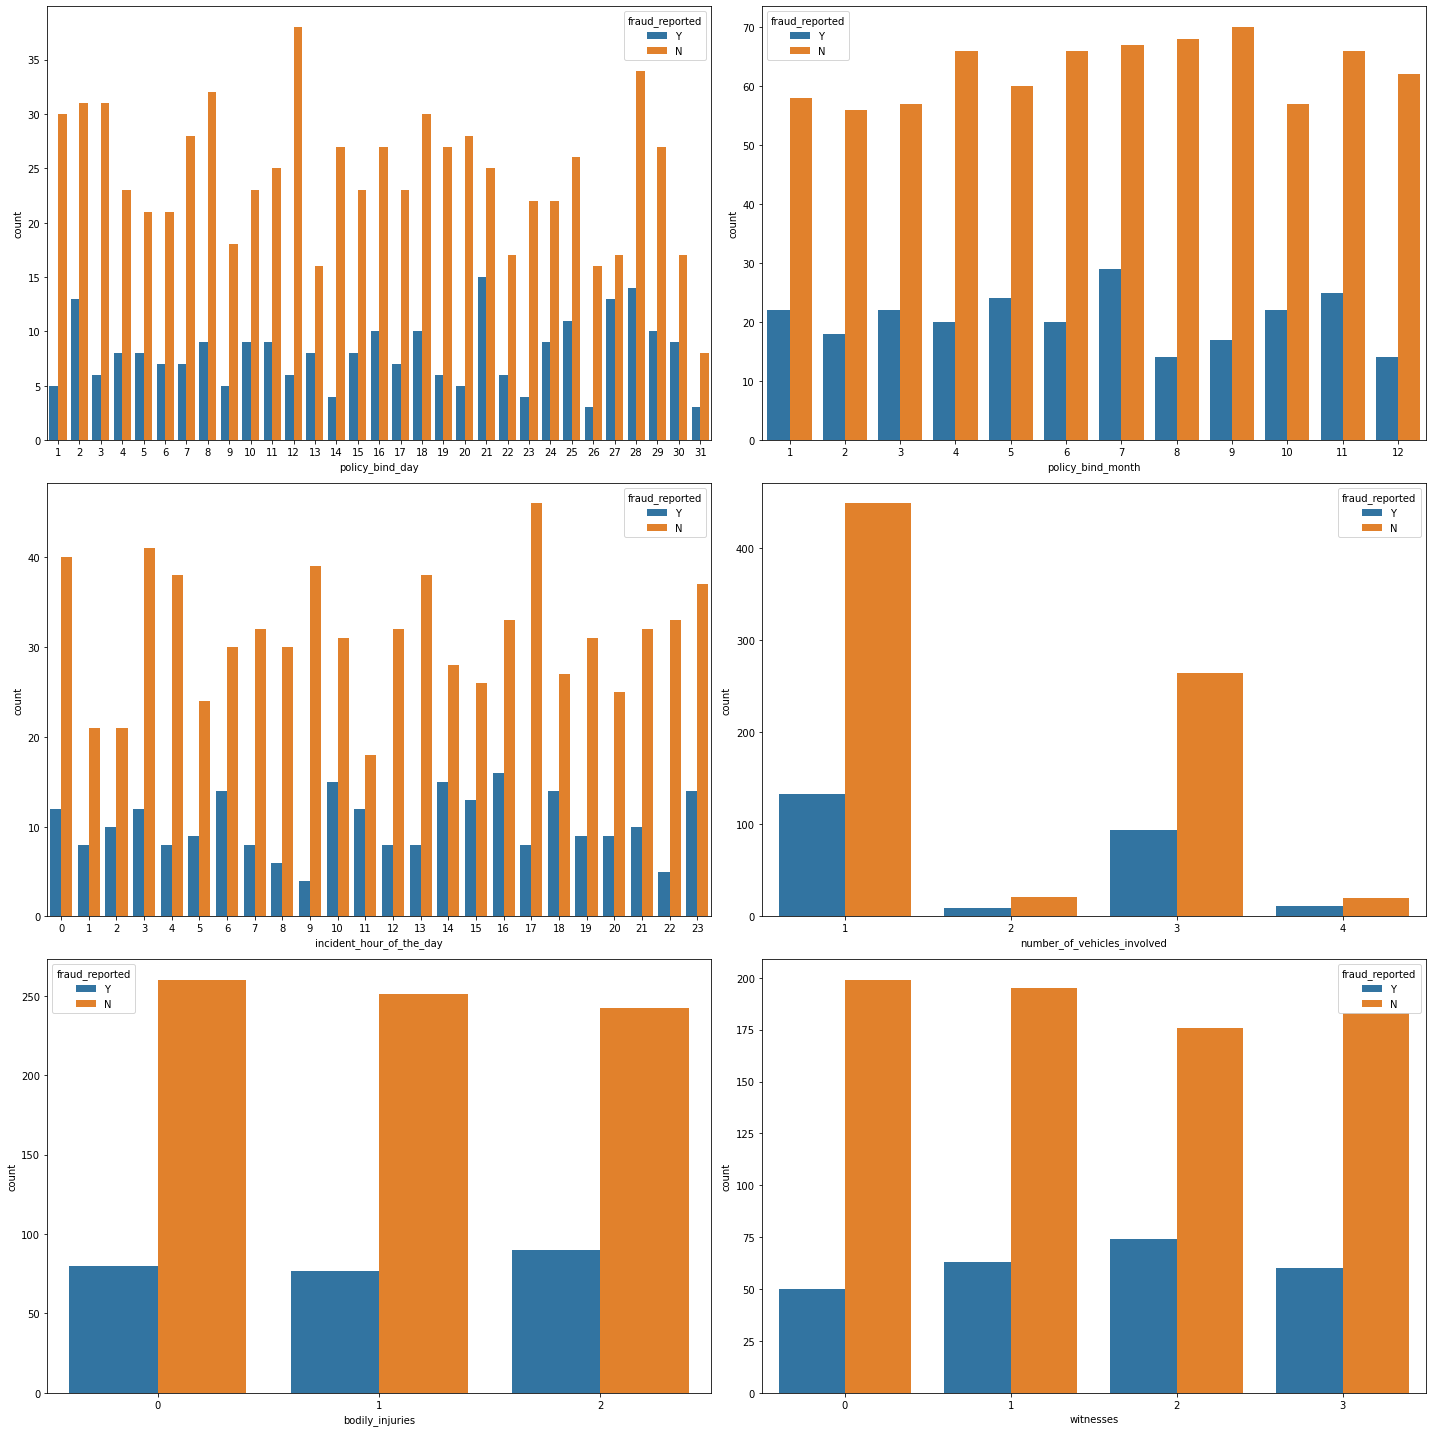

In [104]:
# 21. policy_bind_day, policy_bind_month, incident_hour_of_the_day, 
#number_of_vehicles_involved, bodily_injuries and witnesses Vs fraud_reported:

fig,axes=plt.subplots(3,2,figsize=(20,20))

sns.countplot('policy_bind_day',hue="fraud_reported", data= data, ax=axes[0,0])
sns.countplot('policy_bind_month',hue="fraud_reported", data= data, ax=axes[0,1] )
sns.countplot('incident_hour_of_the_day',hue="fraud_reported", data= data, ax=axes[1,0] )
sns.countplot('number_of_vehicles_involved',hue="fraud_reported", data= data, ax=axes[1,1] )
sns.countplot('bodily_injuries',hue="fraud_reported", data= data, ax=axes[2,0])
sns.countplot('witnesses',hue="fraud_reported", data= data, ax=axes[2,1])

plt.tight_layout()
plt.show()


In [105]:
# Observations:

# Max fraud is from policy_bind_month 7 that is July.

# Max fraud is from policy_bind_day 21st of the month.

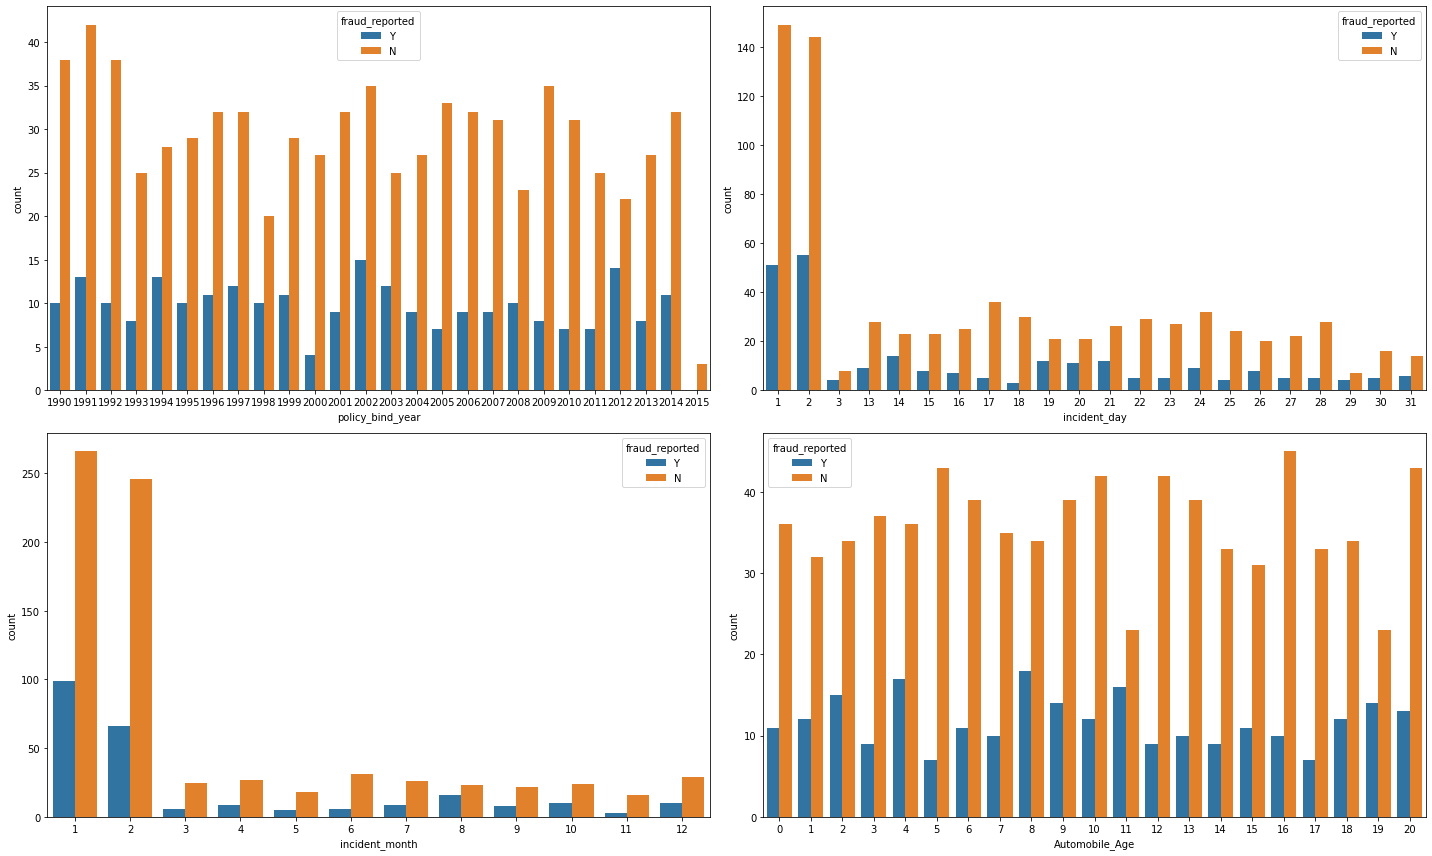

In [106]:
# 22. policy_bind_year, incident_day, incident_month, Automobile_Age Vs fraud_reported:

fig,axes=plt.subplots(2,2,figsize=(20,12))

sns.countplot('policy_bind_year',hue="fraud_reported", data= data, ax=axes[0,0])
sns.countplot('incident_day',hue="fraud_reported", data= data, ax=axes[0,1] )
sns.countplot('incident_month',hue="fraud_reported", data= data, ax=axes[1,0] )
sns.countplot('Automobile_Age',hue="fraud_reported", data= data, ax=axes[1,1] )

plt.tight_layout()
plt.show()

In [107]:
# Observations:

# Maximum incident month is the starting of year that is January and February.

# Maximum incident day is the starting of month that is 1st and 2nd.

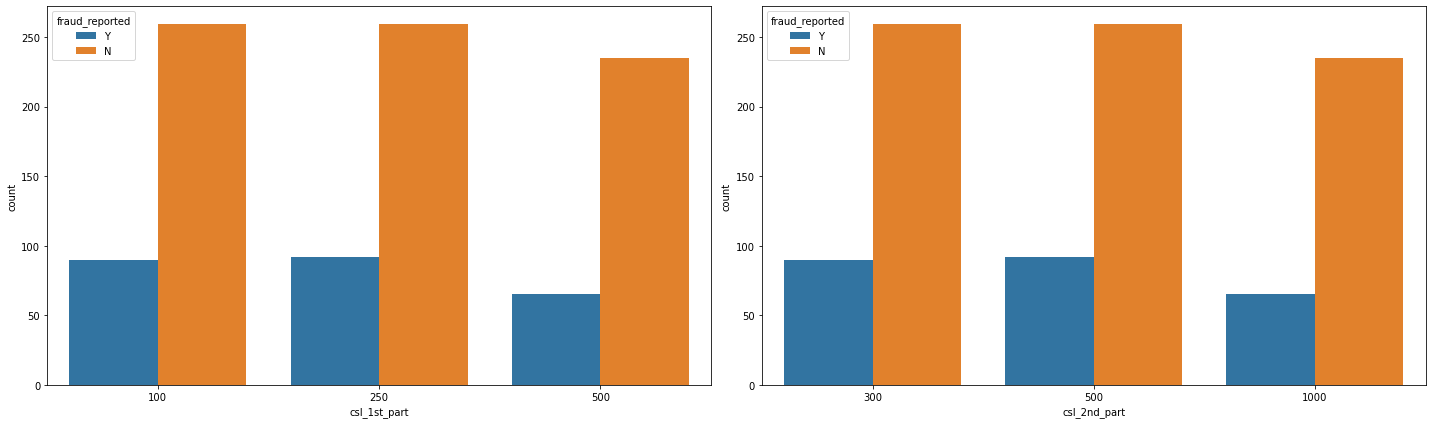

In [108]:
# 23. 'csl_1st_part', 'csl_2nd_part' Vs fraud_reported:

fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.countplot('csl_1st_part',hue="fraud_reported", data= data, ax=axes[0])
sns.countplot('csl_2nd_part',hue="fraud_reported", data= data, ax=axes[1] )
plt.tight_layout()
plt.show()

In [109]:
# Observation:

# No relation is found.

# Explore relationship between different Features:

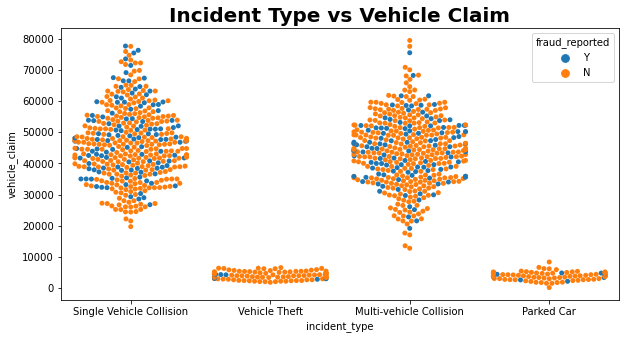

In [110]:
plt.figure(figsize=(10,5))
sns.swarmplot(data['incident_type'], data['vehicle_claim'] ,hue=data["fraud_reported"])
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.show()

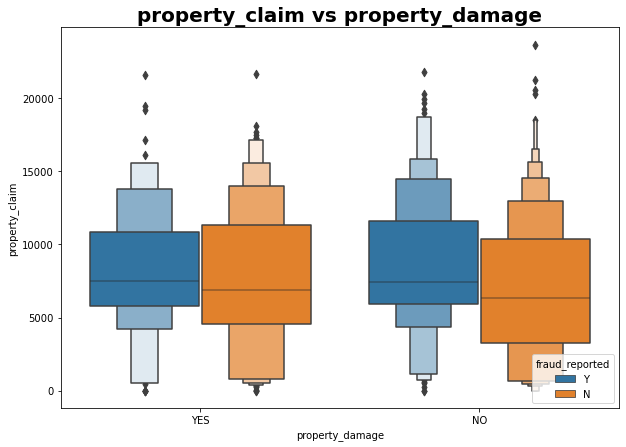

In [111]:
plt.figure(figsize=(10,7))
sns.boxenplot (data['property_damage'],data['property_claim'],hue=data["fraud_reported"])
plt.title('property_claim vs property_damage',fontsize=20,fontweight ='bold')
plt.show()

In [113]:
# Observations:

# As earlier, maximum fraud comes from single and multi vehicle collision.

# No specific relation is shown from above boxen plot of property_claim vs property_damage.

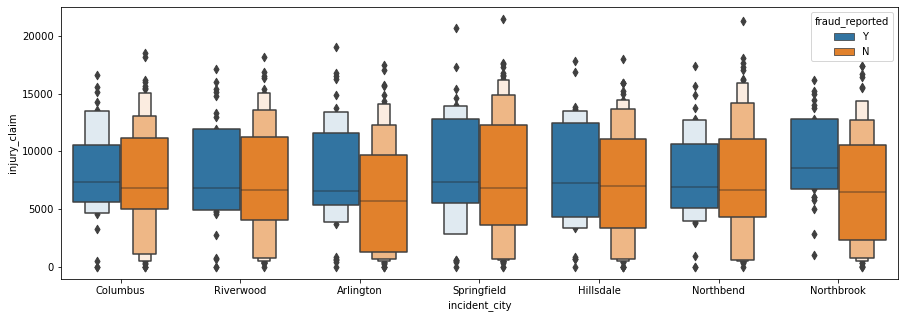

In [114]:
plt.figure(figsize=(15,5))
sns. boxenplot( data['incident_city'], data['injury_claim'], hue=data["fraud_reported"])
plt.show()


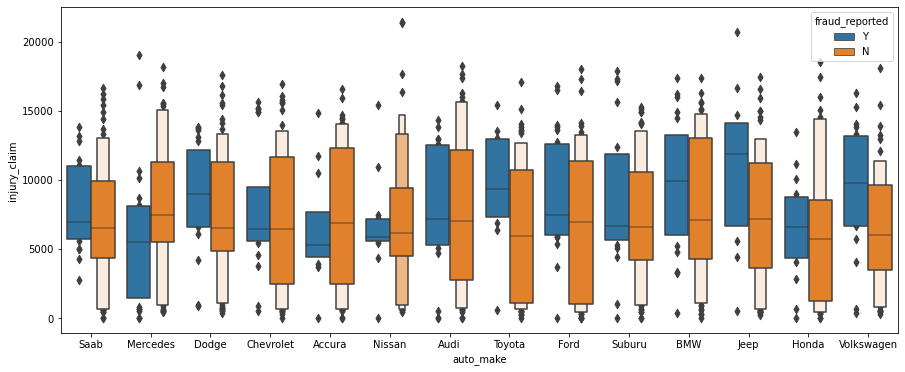

In [115]:
plt.figure(figsize=(15,6))
sns.boxenplot( data['auto_make'], data['injury_claim'],hue=data["fraud_reported"])
plt.show()

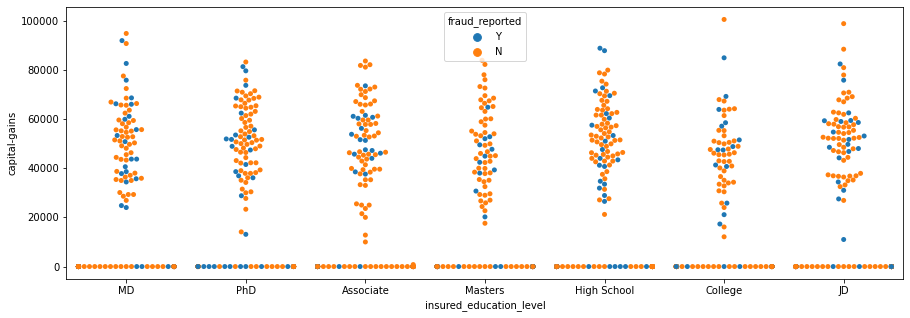

In [116]:
plt.figure(figsize=(15,5))
sns.swarmplot( data['insured_education_level'], data['capital-gains'],hue=data["fraud_reported"])
plt.show()


In [117]:
# Observations:

# Maximum injury claim is reported for Northbrook state which is fraud.

# Maximum fraud injury_claim is for auto type Jeep.

# For capital-gains 0 and education level PhD, fraud is maximum.

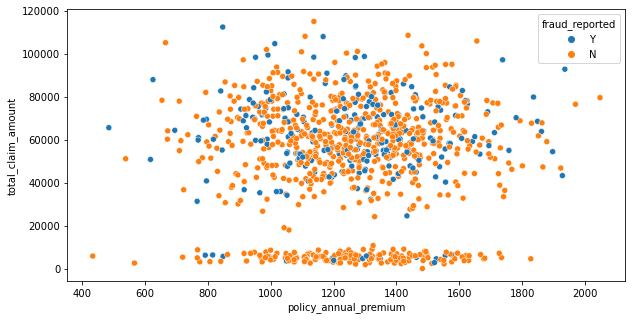

In [118]:
plt.figure(figsize=(10,5))
sns.scatterplot( data['policy_annual_premium'], data['total_claim_amount'], hue=data["fraud_reported"])
plt.show()

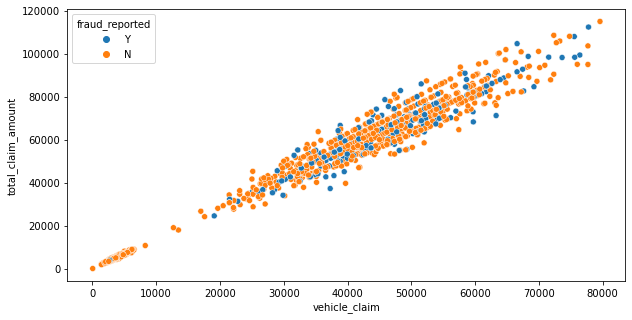

In [119]:
plt.figure(figsize=(10,5))
sns.scatterplot( data['vehicle_claim'], data['total_claim_amount'], hue=data["fraud_reported"])
plt.show()

In [120]:
# Observations:

# vehicle_claim and total_claim_amount are linearly related.

# If total_claim_amount is 0, fraud case is very less as compared to others.

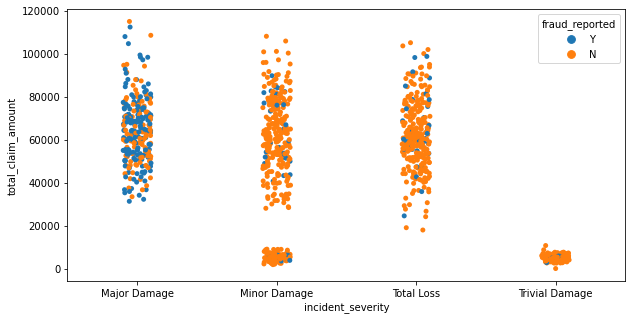

In [121]:
plt.figure(figsize=(10,5))
sns.stripplot( data['incident_severity'], data['total_claim_amount'], hue=data["fraud_reported"])
plt.show()

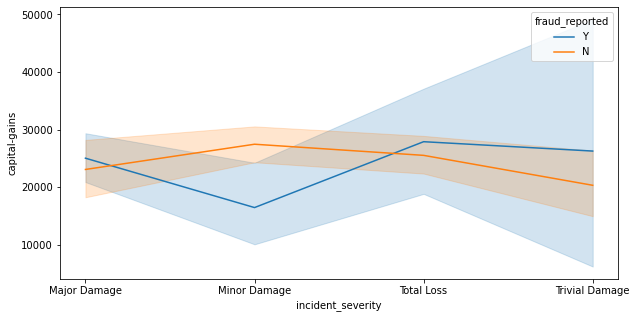

In [122]:
plt.figure(figsize=(10,5))
sns.lineplot( data['incident_severity'], data['capital-gains'], hue=data["fraud_reported"])
plt.show()

In [123]:
# Observations:

# Maximum frauud reported as major damage and total_claim_amount is also high.


# Pair Plot:

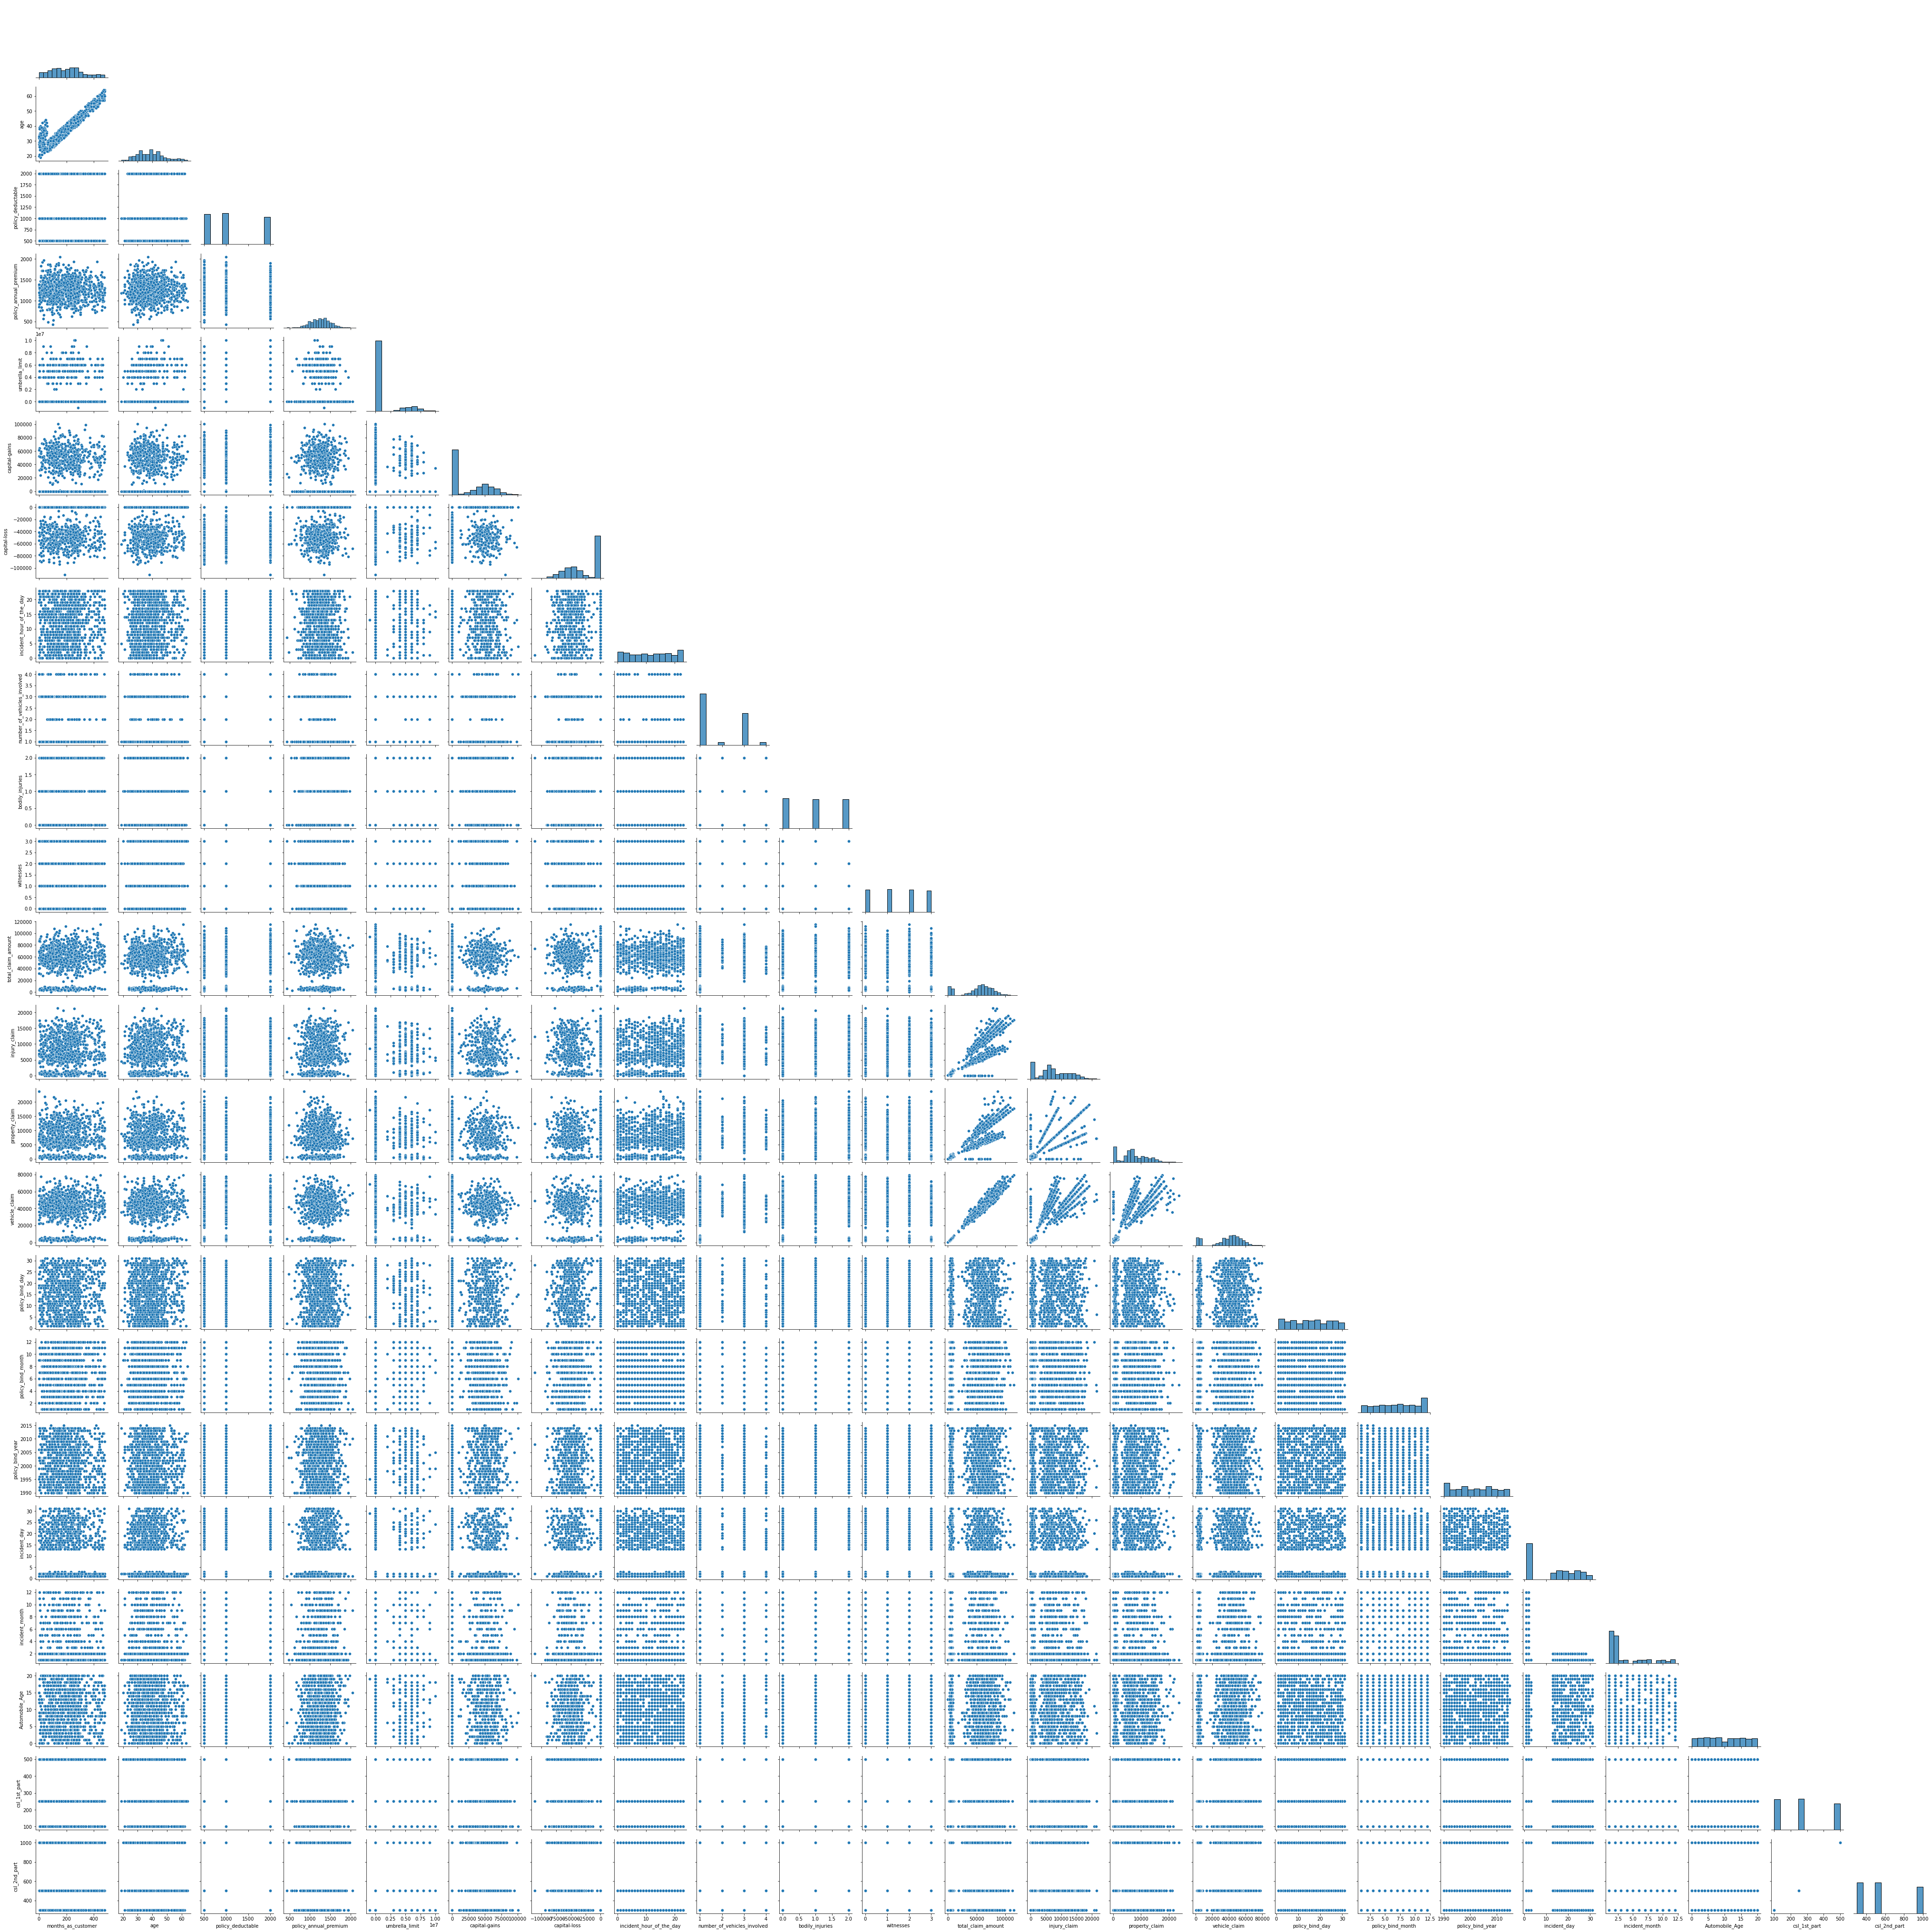

In [124]:
sns.pairplot(data, kind='scatter', corner=True)

# Encoding categorical data

# Using Label Encoder:

In [125]:
data[['csl_1st_part', 'csl_2nd_part']]= data[['csl_1st_part', 'csl_2nd_part']].astype(str)

In [126]:
cat_data = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'csl_1st_part', 'csl_2nd_part']

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    data[i] = le.fit_transform(data[i])
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   fraud_reported  policy_bind_day  policy_bind_month  policy_bind_year  \
0               1               17                 10              2014   
1               1               27                  6              2006   
2               0                9                  6              2000   
3               1               25                  5              1990   
4               0                6                  6              2014   

   incident_day  incident_month  Automobile_Age  csl_1st_part  csl_2nd_part  \
0            25               1              11             1             2   
1            21               1               8             1             2   
2            22               2               8             0             1   
3             1              10               1             1             2   
4            17               2               6             2             0   

   age_group  
0      41-50  
1      41-50  
2      21-30  
3      41-50  
4      41-50  

[5 rows x 41 columns]

In [128]:
data.drop(['age_group'], axis=1, inplace= True)

# Outliers Detection and Removal:

In [129]:
num_data = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']


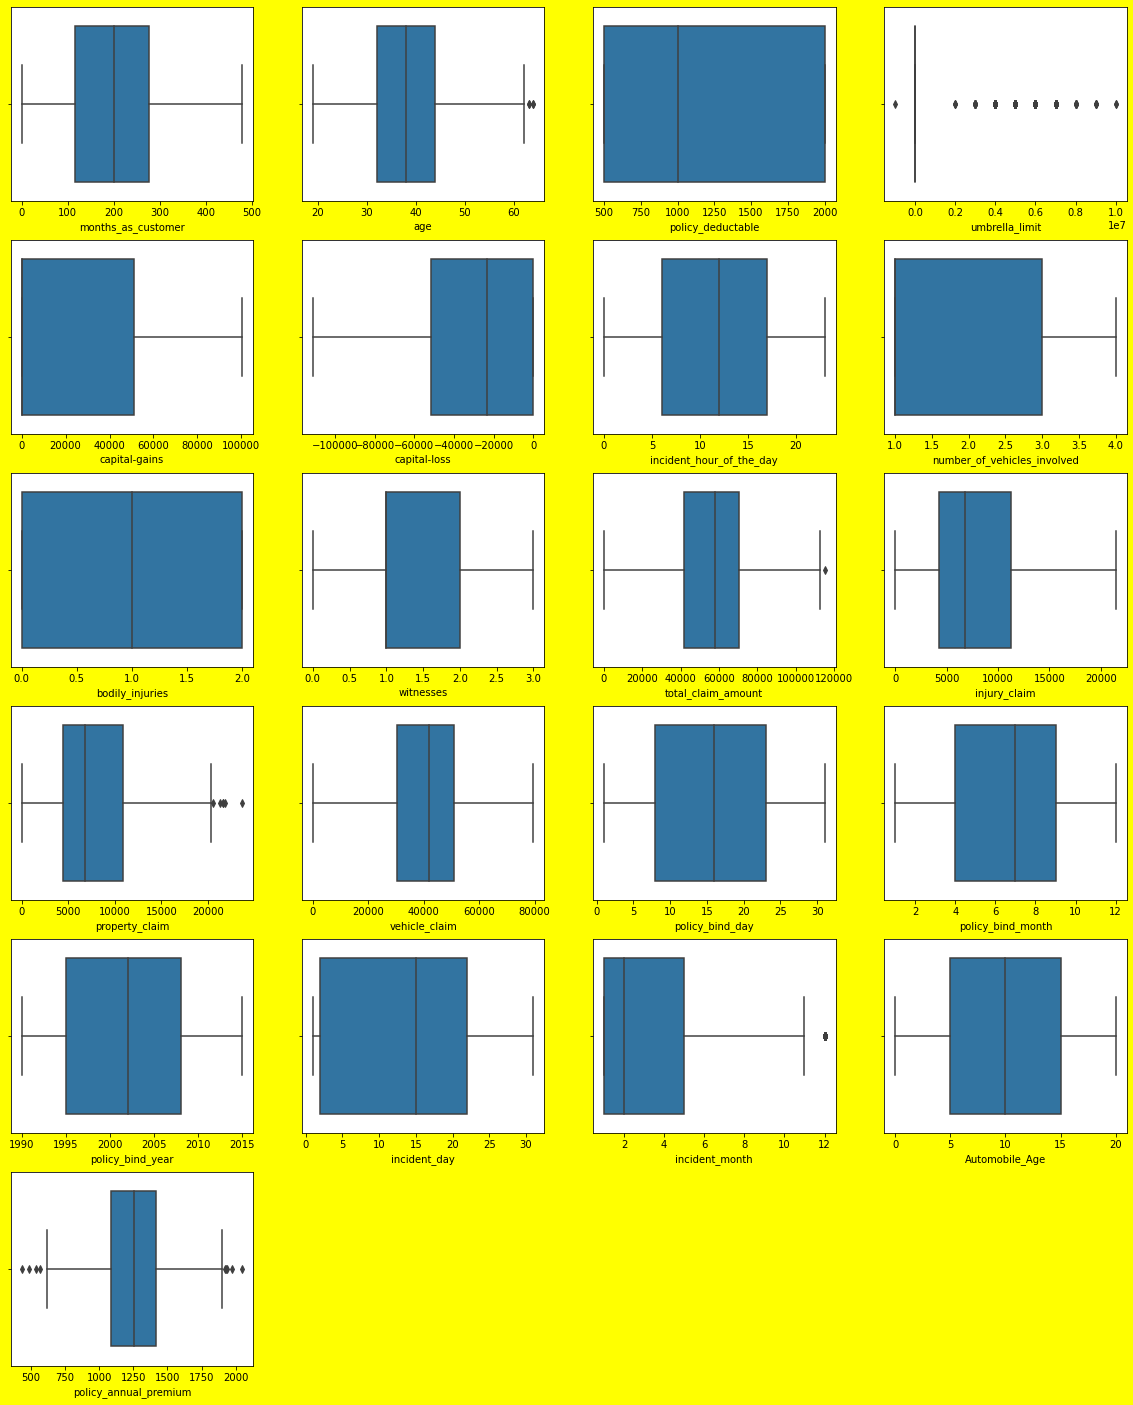

In [130]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for x in num_data:
    if plotnumber<=21:
        plt.subplot(6,4,plotnumber)
        sns.boxplot(data[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

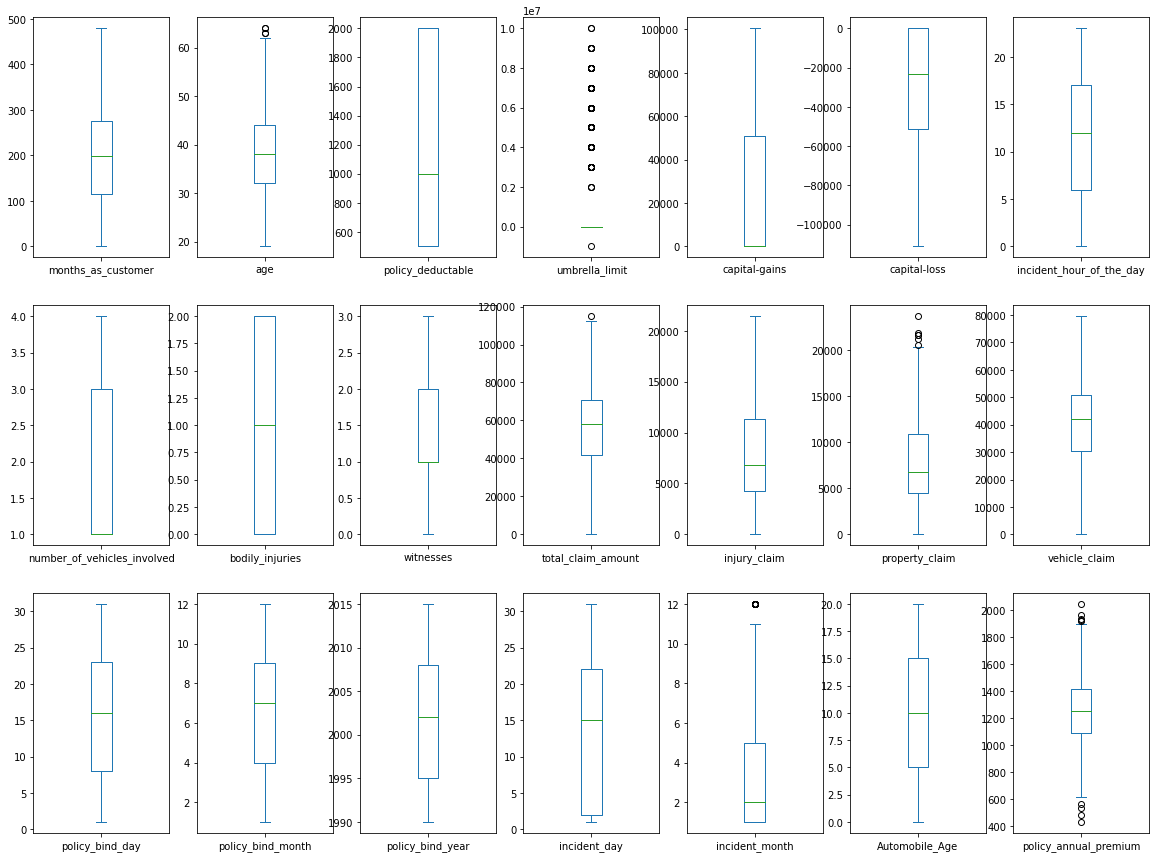

In [131]:
data[num_data].plot(kind ='box', subplots =True , layout =(3,7), figsize = (20,15))
plt.show()

In [132]:
#Observations :

# From the previous Boxplot , it is seen that there are some outiers in numarical featues columns. Let's remove it.

# Outliers removal by Z score:

In [133]:
df= data.copy()

In [134]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))


(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975]), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 27,  5,  5,  5,  4, 12,
        5,  5,  5]))


In [139]:
data1 = data[(z<3).all(axis = 1)]
data1.shape

(980, 40)

In [138]:
print ("Percentage of data loss",((data.shape[0]- data1.shape[0])/data.shape[0])*100, "%")

Percentage of data loss 2.0 %


In [140]:
# Outliers are removed.

# Correlation:

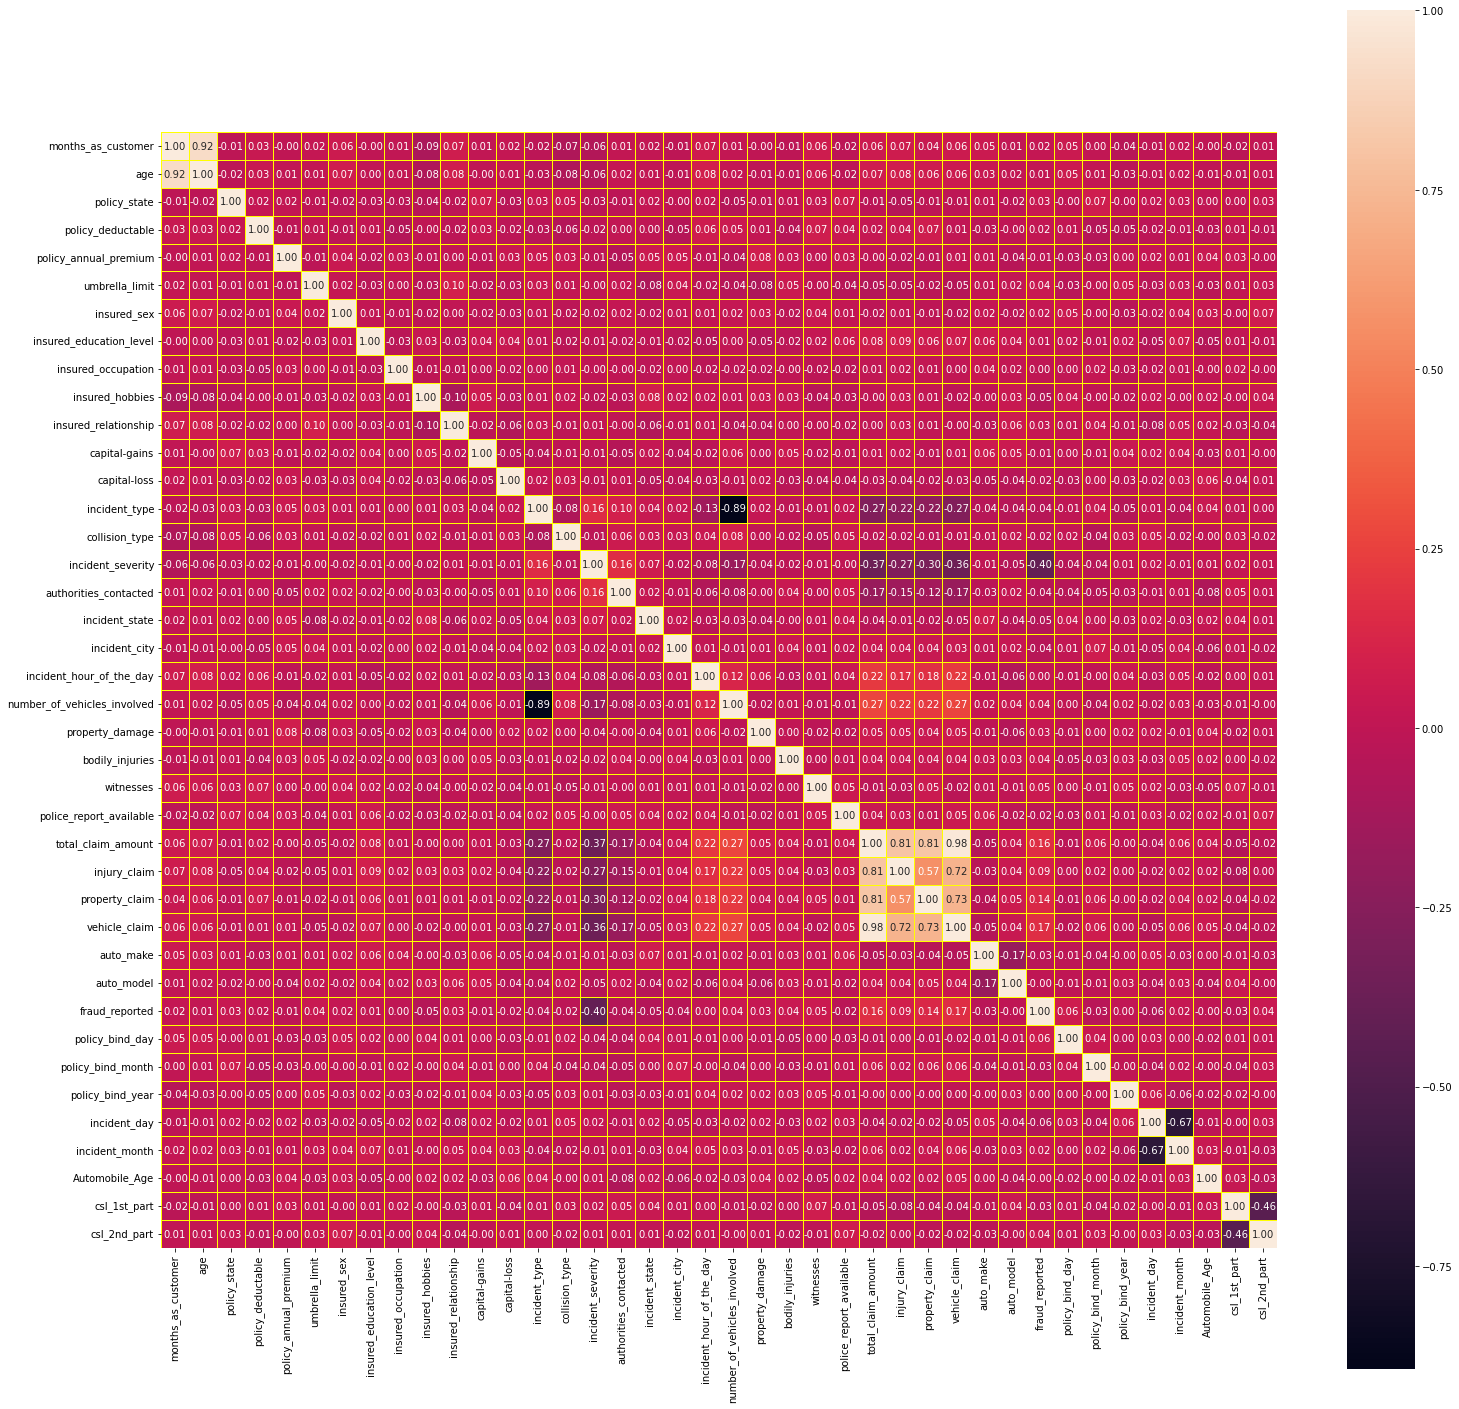

In [141]:
plt.subplots(figsize=(25,25))
sns.heatmap(data1.corr(), annot= True, linecolor= "yellow", linewidths= 1, square=True, fmt='0.2f')
plt.show()


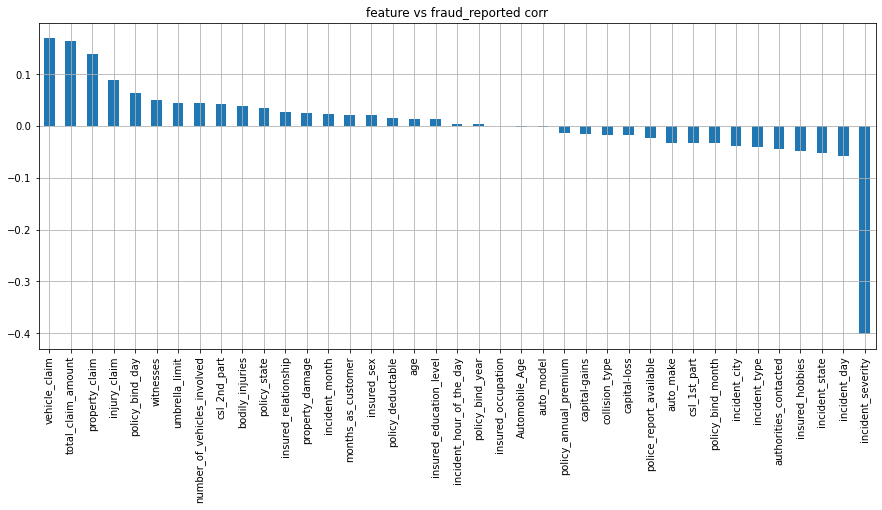

In [142]:
data1.drop("fraud_reported", axis=1).corrwith(data1["fraud_reported"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature vs fraud_reported corr')
plt.show()

In [143]:
# Observations:

# injury_claim,property_claim,vehicle_claim and total_claim_amount are highly correlated with each other.

# no_of_vehicle_involved and incident_type are highly negative correlated with each others.

# Other variable are poorly correlated with target variable.

# Maximum correlation of target variable is with incident_severity. The relation is negetive.

# insured_occupation, Automobile_Age and auto_model has very less relation (around 0 ) with target

# Skewness:

In [144]:
data1.skew().sort_values()

vehicle_claim                 -0.620936
total_claim_amount            -0.593593
capital-loss                  -0.376884
incident_state                -0.149255
authorities_contacted         -0.114044
csl_2nd_part                  -0.094370
auto_model                    -0.073462
insured_hobbies               -0.061488
insured_occupation            -0.055360
incident_hour_of_the_day      -0.039280
policy_state                  -0.038157
collision_type                -0.032778
auto_make                     -0.028739
policy_bind_month             -0.024643
bodily_injuries                0.003757
insured_education_level        0.006286
witnesses                      0.026211
policy_bind_day                0.028152
policy_annual_premium          0.035964
incident_city                  0.043882
Automobile_Age                 0.054522
incident_day                   0.055443
policy_bind_year               0.065022
insured_relationship           0.078339
incident_type                  0.090563


In [145]:
# Observation :

# Skewness is present.'umbrella_limit','total_claim_amount','incident_month' and 'vehicle_claim' are numarical variable with skew data.

# 'incident_month', 'umbrella_limit' are skewed and numarical but it is discrete in nature. So ignore it.

# total_claim_amount','vehicle_claim' are continuous numarical data.

In [146]:
skew_data =['total_claim_amount','vehicle_claim']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

data1[skew_data] = scaler.fit_transform(data1[skew_data].values)
data1[skew_data].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

In [147]:
# Observations:

# Overall skewness is removed.

# Data Balancing (SMOTE) :

In [148]:
# Let's balance the target variablefraud_reported by SMOTE()


In [149]:
df2= data1.copy()

In [150]:
data1['fraud_reported'].value_counts() 

0    740
1    240
Name: fraud_reported, dtype: int64

In [151]:
from imblearn.over_sampling import SMOTE
over = SMOTE()

# splitting data in target and dependent feature
x = data1.drop(['fraud_reported'], axis =1)
y = data1['fraud_reported']
x,y = over.fit_resample(x,y)
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Checking Multicollinearity:

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

VIF                     Features
0      32.606864           months_as_customer
1     152.663721                          age
2       2.485540                 policy_state
3       5.158751            policy_deductable
4      31.818911        policy_annual_premium
5       1.302760               umbrella_limit
6       1.748741                  insured_sex
7       3.532990      insured_education_level
8       4.160460           insured_occupation
9       4.279022              insured_hobbies
10      3.415583         insured_relationship
11      1.939836                capital-gains
12      2.120352                 capital-loss
13      7.685988                incident_type
14      2.855307               collision_type
15      2.573208            incident_severity
16      3.152589        authorities_contacted
17      3.486985               incident_state
18      3.272856                incident_city
19      4.518844     incident_hour_of_the_day
20     16.463880  number_of_vehicles_involved
21      1.376225              property_damage
22      2.468945              bodily_injuries
23      3.037452                    witnesses
24      1.445787      police_report_available
25  36657.861237           total_claim_amount
26   5606.532802                 injury_claim
27   5614.372324               property_claim
28  18280.285011                vehicle_claim
29      4.174684                    auto_make
30      4.725669                   auto_model
31      4.582004              policy_bind_day
32      5.206561            policy_bind_month
33  14994.908483             policy_bind_year
34      4.711761                 incident_day
35      3.916779               incident_month
36      4.035027               Automobile_Age
37      2.587816                 csl_1st_part
38      3.145884                 csl_2nd_part

In [153]:
# Observation:

# Multicollinearity present between different features.

In [154]:
# Will remove this  after checking PCA.

# Principal Component Analysis (PCA) :

In [155]:
x1= x.copy()

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

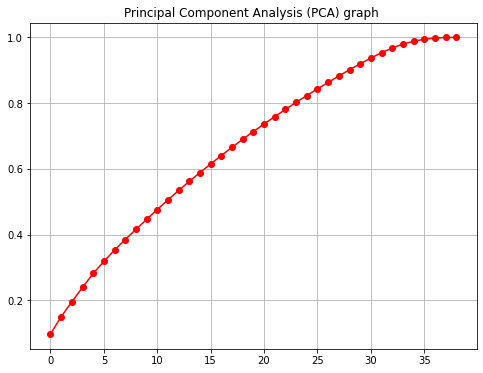

In [157]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

# Observations:

In [158]:
# Here , above 90% variance gives the first 30 component. Let's take the first 30 components.

In [192]:
pca_new = PCA(n_components=30)
x_scale_new = pca_new.fit_transform(x_scale)
print_x=pd.DataFrame(x_scale_new )

In [195]:
x_scale_new

array([[-0.04004952,  0.61559202, -0.20941675, ...,  1.10869629,
         1.52159409,  0.07741951],
       [ 4.48504155,  0.78111783, -0.26149508, ...,  0.23008204,
         0.62053278, -1.0188006 ],
       [ 1.0612613 , -0.95662904,  1.44033578, ...,  1.01113109,
        -0.66197251, -0.38188796],
       ...,
       [-2.33513725,  0.91304189, -0.45116264, ...,  0.16779699,
         0.09872827,  1.00773716],
       [ 3.60651557, -1.24928358, -0.77010144, ..., -0.08945982,
        -0.34891514, -0.10865166],
       [-0.27070555, -1.61372871,  0.17543947, ...,  1.30756083,
        -0.43633661, -0.17041227]])

# Final predictions using different Classification ML Models :

# Find best Random state:

In [165]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(500, 2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.845945945945946 on Random_state 1620


In [166]:
# Here the best accuracy on Random_state=1620, Let's take it.

In [167]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (1110, 30)
Training target shape: (1110,)
Test feature shape: (370, 30)
Test target shape: (370,)


# Using LogisticRegression():

In [168]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state= 1620)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.845945945945946
cof_mat:
  [[156  35]
 [ 22 157]]
classification report:
                precision    recall  f1-score   support

           0       0.88      0.82      0.85       191
           1       0.82      0.88      0.85       179

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

-----------
-----------
training score :  0.7585585585585586
testing score :  0.845945945945946


# Use GridSearchCV for hyperparameter tuning:

In [169]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1','elasticnet', 'none'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [170]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8405405405405405
cof_mat:

  [[155  36]
 [ 23 156]]
classification report:
                precision    recall  f1-score   support

           0       0.87      0.81      0.84       191
           1       0.81      0.87      0.84       179

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

-----------
-----------
training score :  0.7567567567567568
testing score :  0.8405405405405405


In [171]:
# Observations:

# Scores have not improved

# Using DecisionTreeClassifier()

In [172]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.7648648648648648


cof_mat:  [[140  51]
 [ 36 143]]


classification report: 

               precision    recall  f1-score   support

           0       0.80      0.73      0.76       191
           1       0.74      0.80      0.77       179

    accuracy                           0.76       370
   macro avg       0.77      0.77      0.76       370
weighted avg       0.77      0.76      0.76       370

-----------
-----------
training score :  1.0
testing score :  0.7648648648648648


# Use GridSearchCV for hyperparameter tuning:

In [173]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}


In [188]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.7567567567567568


cof_mat:  [[134  57]
 [ 33 146]]


classification report: 

               precision    recall  f1-score   support

           0       0.80      0.70      0.75       191
           1       0.72      0.82      0.76       179

    accuracy                           0.76       370
   macro avg       0.76      0.76      0.76       370
weighted avg       0.76      0.76      0.76       370

-----------
-----------
training score :  1.0
testing score :  0.7567567567567568


In [189]:
# Observations:

# Scores have not improved

# Using GradientBoostingClassifier():

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8621621621621621


cof_mat:  [[165  26]
 [ 25 154]]


classification report: 

               precision    recall  f1-score   support

           0       0.87      0.86      0.87       191
           1       0.86      0.86      0.86       179

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

-----------
-----------
training score :  0.9576576576576576
testing score :  0.8621621621621621


# Using Gridsearch CV:

In [191]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0,0.001], 'loss': ['log_loss', 'deviance', 'exponential'],
        "min_samples_leaf" :[1,2,3], "criterion":['friedman_mse', 'squared_error','mse'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'deviance', 'min_samples_leaf': 3, 'min_samples_split': 3}


In [193]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8135135135135135


cof_mat:  [[149  42]
 [ 27 152]]


classification report:

                precision    recall  f1-score   support

           0       0.85      0.78      0.81       191
           1       0.78      0.85      0.82       179

    accuracy                           0.81       370
   macro avg       0.82      0.81      0.81       370
weighted avg       0.82      0.81      0.81       370

-----------
-----------
training score :  1.0
testing score :  0.8135135135135135


In [194]:
# Observations:

# Scores have not improved

# Using RandomForestClassifier()

In [196]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8756756756756757


cof_mat:  [[172  19]
 [ 27 152]]


classification report:                precision    recall  f1-score   support

           0       0.86      0.90      0.88       191
           1       0.89      0.85      0.87       179

    accuracy                           0.88       370
   macro avg       0.88      0.87      0.88       370
weighted avg       0.88      0.88      0.88       370

-----------
-----------
training score :  1.0
testing score :  0.8756756756756757


# Use GridSearchCV for hyperparameter tuning:

In [197]:
params = {'n_estimators' : [100,80, 140], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy", "log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}


In [198]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.8702702702702703


cof_mat:  [[171  20]
 [ 28 151]]


classification report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       191
           1       0.88      0.84      0.86       179

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

-----------
-----------
training score :  1.0
testing score :  0.8702702702702703


In [199]:
# Observations:

# Accuracy score is not improved after using GridSearchCV with RandomForestClassifier()

# ExtraTreesClassifier():

In [200]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8945945945945946


cof_mat:  [[176  15]
 [ 24 155]]


classification report:                precision    recall  f1-score   support

           0       0.88      0.92      0.90       191
           1       0.91      0.87      0.89       179

    accuracy                           0.89       370
   macro avg       0.90      0.89      0.89       370
weighted avg       0.90      0.89      0.89       370

-----------
-----------
training score :  1.0
testing score :  0.8945945945945946


# Use GridSearchCV for hyperparameter tuning:

In [201]:
params = {'n_estimators' : [100,80, 120], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 80}


In [202]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9


cof_mat:  [[173  18]
 [ 19 160]]


classification report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       191
           1       0.90      0.89      0.90       179

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

-----------
-----------
training score :  1.0
testing score :  0.9


In [203]:
# Observations:

# Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

# Using AdaBoostClassifier:

In [204]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.7945945945945946


cof_mat:  [[145  46]
 [ 30 149]]


classification report:                precision    recall  f1-score   support

           0       0.83      0.76      0.79       191
           1       0.76      0.83      0.80       179

    accuracy                           0.79       370
   macro avg       0.80      0.80      0.79       370
weighted avg       0.80      0.79      0.79       370

-----------
-----------
training score :  0.8333333333333334
testing score :  0.7945945945945946


# Using GridSearchCV for hyperparameter tuning:

In [205]:
params = {'n_estimators' : [50,40, 60, 45], 'learning_rate': [1,0.1,0.01, 0.001] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'n_estimators': 60}


In [206]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.8378378378378378


cof_mat:  [[163  28]
 [ 32 147]]


classification report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       191
           1       0.84      0.82      0.83       179

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

-----------
-----------
training score :  0.7783783783783784
testing score :  0.8378378378378378


In [207]:
# Observations:

# Scores have improved

# Using SVC('rbf'):

In [208]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [209]:
svmkernel('rbf')

accu score :  0.8432432432432433


cof_mat:  [[157  34]
 [ 24 155]]


classification report: 

               precision    recall  f1-score   support

           0       0.87      0.82      0.84       191
           1       0.82      0.87      0.84       179

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

-----------
-----------
training score :  0.9351351351351351
testing score :  0.8432432432432433


# Using SVC ('linear'):

In [210]:
svmkernel('linear')

accu score :  0.8324324324324325


cof_mat:  [[158  33]
 [ 29 150]]


classification report: 

               precision    recall  f1-score   support

           0       0.84      0.83      0.84       191
           1       0.82      0.84      0.83       179

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.7594594594594595
testing score :  0.8324324324324325


# Using SVC ('poly'):

In [211]:
svmkernel('poly')

accu score :  0.7702702702702703


cof_mat:  [[116  75]
 [ 10 169]]


classification report: 

               precision    recall  f1-score   support

           0       0.92      0.61      0.73       191
           1       0.69      0.94      0.80       179

    accuracy                           0.77       370
   macro avg       0.81      0.78      0.77       370
weighted avg       0.81      0.77      0.76       370

-----------
-----------
training score :  0.8864864864864865
testing score :  0.7702702702702703


In [212]:
# Observation

# SVC('rbf') is better than two others. let's take it for further process.

# Here, Extratreeclassifier() gives the best accuracy score. Let's check cv with the hyper tunned model of respective ML model.

# Cross Validtion:

In [213]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [grid_log_best, grid_clf_best, gbdt, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale_new,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(C=0.01, solver='liblinear')

 Cross Validation Score :  [0.62264151 0.62264151 0.78773585 0.81516588 0.81516588 0.87677725
 0.82938389]

Mean CV Score : 0.7670731084171126

Std deviation : 0.09463567972021987

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='log2')

 Cross Validation Score :  [0.56132075 0.61320755 0.66037736 0.78199052 0.7535545  0.73933649
 0.77725118]

Mean CV Score : 0.69814833739988

Std deviation : 0.08054852275209923

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.60849057 0.61792453 0.80660377 0.83412322 0.86729858 0.89099526
 0.88151659]

Mean CV Score : 0.7867075024590895

Std deviation : 0.11291760685706774

-----------
-----------
Cross Validation Score of : RandomForestClassifier(criterion='entropy')

 Cross Validation Score :  [0.59433962 0.64622

In [214]:
# Observations:



# Among 7 classification models ExtraTreesClassifier() gives good accuracy and maximum f1 score along with a good Cross-validation score.


# Let's plot AUC-ROC Curve.


In [215]:
# Plotting ROC AUC Curve to choose best model

In [216]:
grid_log_best.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
gbdt.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [217]:
grid_log_best.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
gbdt.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


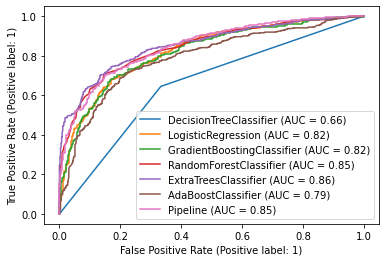

In [218]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(grid_log_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(gbdt, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.show()

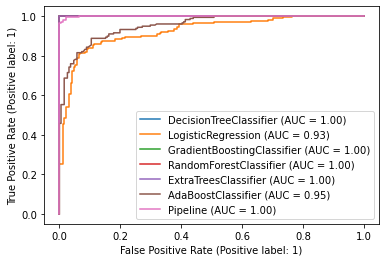

In [219]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(grid_log_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbdt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.show()

In [220]:
# Observations:

# Here ExtraTreesClassifier gives best AUC score for training and testing dataset. So it is the final model for this dataset.

In [221]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8837837837837837


cof_mat:  [[173  18]
 [ 25 154]]


classification report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       191
           1       0.90      0.86      0.88       179

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

-----------
-----------
training score :  1.0
testing score :  0.8837837837837837


# confusion matrix

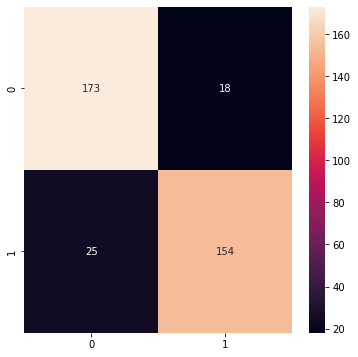

In [222]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Load the model:

In [223]:
import pickle
pickle.dump(grid_etc_best, open("Insurance_Fraud_Classification_model", "wb"))
load_Insurance_Fraud_Classification_model= pickle.load(open("Insurance_Fraud_Classification_model", "rb"))


In [224]:
y_pred = load_Insurance_Fraud_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

Predicted Values  Actual Values
40                  1              1
226                 0              0
197                 0              0
300                 0              0
258                 0              1
343                 1              1